In [1]:
# trimming frames from the alphafold trajectories

protein_names = ["BPTI", "BRD4", "HOIP", "LXR", "MBP"]
# set lower threshold to 2.5: 
# if rigid, divide by 2, elif flexible, multiply by 2; 
# if no existing PDB multiply by 2 
conf_thresholds = [(2.5,100),(5,100),(10,100),(1.25,100),(5,100)]

# upper thresholds for contact_order: if small: 99.9, medium: 99.5, large: 99
# lower threshfolds for contact_order
# start with 2 - 
# if small and rigid remove 0.5
# if flexible add 1

con_thresholds = [(1.5,99.5),(2,99),(3,99.5),(1.5,99.5),(3,99.5)]

cov_thresholds = con_thresholds

res_thresholds = [(0.01,99.5),(0.01,99.5),(0.01,99.5),(0.01,99.5),(0.01,99.5)]


protein_names = ["MoPrP",]
# set lower threshold to 2.5: 
# if rigid, divide by 2, elif flexible, multiply by 2; 
# if no existing PDB multiply by 2 
conf_thresholds = [(2.5,100),]

# upper thresholds for contact_order: if small: 99.9, medium: 99.5, large: 99
# lower threshfolds for contact_order
# start with 2 - 
# if small and rigid remove 0.5
# if flexible add 1

con_thresholds = [(1.5,99.5),]

cov_thresholds = con_thresholds

res_thresholds = [(0.01,99.5),]





k_clusters = 20



In [2]:

import os 

import MDAnalysis as mda
import numpy as np
import json




/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
BPTI_top_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/P00974_60_1_af_sample_127_10000_protonated.pdb"
BPTI_traj_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/P00974_60_1_af_sample_127_10000_protonated.xtc"
BPTI_json_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/P00974_60_1_af_sample_127_10000_ranks.json"
BPTI_segs_path = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_residue_segs_trimmed.txt"
BPTI_num_residues = 58


BRD4_top_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/BRD4_APO_484_1_af_sample_127_10000_protonated.pdb"
BRD4_traj_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/BRD4_APO_484_1_af_sample_127_10000_protonated.xtc"
BRD4_json_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/BRD4_APO_484_1_af_sample_127_10000_ranks.json"
BRD4_segs_path = "/home/alexi/Documents/ValDX/raw_data/BRD4/BRD4_APO/BRD4_APO_segs_trimmed.txt"
BRD4_num_residues = 484

HOIP_top_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/HOIP_apo697_1_af_sample_127_10000_protonated.pdb"
HOIP_traj_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/HOIP_apo697_1_af_sample_127_10000_protonated.xtc"
HOIP_json_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/HOIP_apo697_1_af_sample_127_10000_ranks.json"
HOIP_segs_path = "/home/alexi/Documents/ValDX/raw_data/HOIP/HOIP_apo/HOIP_APO_segs_trimmed.txt"
HOIP_num_residues = 376

LXR_top_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/LXRa200_1_af_sample_127_10000_protonated.pdb"
LXR_traj_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/LXRa200_1_af_sample_127_10000_protonated.xtc"
LXR_json_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/LXRa200_1_af_sample_127_10000_ranks.json"
LXR_segs_path = "/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRa_APO_segs200_trimmed.txt"
LXR_num_residues = 250


MBP_top_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/MBP_wt_1_af_sample_127_10000_protonated.pdb"
MBP_traj_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/MBP_wt_1_af_sample_127_10000_protonated.xtc" 
MBP_json_path = "/home/alexi/Documents/interpretable-hdxer/data/si_ifg1/json_corrected/MBP_wt_1_af_sample_127_10000_ranks.json"
MBP_segs_path = "/home/alexi/Documents/ValDX/raw_data/MBP/MaltoseBindingProtein/MBP_wt1_segs_trimmed.txt"
MBP_num_residues = 396

MoPrP_top_path = "/home/alexi/Documents/xFold_Sampling/af_sample/MoPrP_max_plddt_4334.pdb"
MoPrP_traj_path = "/home/alexi/Documents/xFold_Sampling/af_sample/MoPrP_plddt_ordered.xtc"
MoPrP_json_path = "/home/alexi/Documents/xFold_Sampling/af_sample/MoPrP/MoPrP_1_af_sample_127_10000_ranks.json"
MoPrP_segs_path = "/home/alexi/Documents/ValDX/figure_scripts/jaxent_cross_validation/MoPrP/MoPrP/output/MoPrP_segments.txt"
MoPrP_num_residues = 101



proteins = {
            # "BPTI": {"top": BPTI_top_path, "traj": BPTI_traj_path, "json": BPTI_json_path, "num_residues": BPTI_num_residues, "segs_path":BPTI_segs_path, "ref_index": 1050},
            # "BRD4": {"top": BRD4_top_path, "traj": BRD4_traj_path, "json": BRD4_json_path, "num_residues": BRD4_num_residues, "segs_path":BRD4_segs_path, "ref_index": 2399},
            # "HOIP": {"top": HOIP_top_path, "traj": HOIP_traj_path, "json": HOIP_json_path, "num_residues": HOIP_num_residues, "segs_path":HOIP_segs_path, "ref_index": 1969},
            # "LXR": {"top": LXR_top_path, "traj": LXR_traj_path, "json": LXR_json_path, "num_residues": LXR_num_residues, "segs_path":LXR_segs_path, "ref_index": 476},
            # "MBP": {"top": MBP_top_path, "traj": MBP_traj_path, "json": MBP_json_path, "num_residues": MBP_num_residues, "segs_path":MBP_segs_path, "ref_index": 1791},
            "MoPrP": {"top": MoPrP_top_path, "traj": MoPrP_traj_path, "json": MoPrP_json_path, "num_residues": MoPrP_num_residues, "segs_path":MoPrP_segs_path, "ref_index": 4334}
            }



def load_json(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data


json_data = {protein: load_json(proteins[protein]["json"]) for protein in protein_names}


from typing import Dict

def extract_val_json(protein_data: Dict, key: str="plddt")->np.array:
    
    protein_data = dict(sorted(protein_data.items(), key=lambda x: int(x[0].split("_")[1]), reverse=True))

    val_data = []
    for msa, run in protein_data.items():
        for rank, data in run.items():
            if key in data:
                val_data.append(data[key])

    return np.array(val_data)

plddt_data = {protein: extract_val_json(json_data[protein]) for protein in protein_names}

max_pae_data = {protein: extract_val_json(json_data[protein], key='max_pae') for protein in protein_names}

ptm_data = {protein: extract_val_json(json_data[protein], key='ptm') for protein in protein_names}



In [4]:

import sys
sys.path.append("/home/alexi/Documents/ValDX/")
from ValDX.VDX_dataclasses import Segments

segs_data = {protein:Segments(segs_path=proteins[protein]["segs_path"]) for protein in proteins}


res_data = {protein:segs_data[protein].residues for protein in proteins}
print(res_data)

/home/alexi/Documents/interpretable-hdxer/notebooks/AF_Ensemble_Cleaning


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


Segments class created with 14 peptides
Resnumbers calculated for 14 segments
Resnumbers calculated for 14 segments
Residues calculated for 79 segments
Resnumbers calculated for 14 segments
Peptides calculated for 14 segments
Calculating residue centrality
Resnumbers calculated for 14 segments
Calculating peptide centrality
Resnumbers calculated for 14 segments
Peptides calculated for 14 segments
Calculating residue centrality
Resnumbers calculated for 14 segments
Peptide centrality calculated for 14 peptides
{'MoPrP': array([  5,   6,   7,   8,   9,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  27,  28,  29,  30,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101])}


In [5]:
# calculate RMSD of each frame in trajectory to the first frame
import pandas as pd

from MDAnalysis.analysis import rms
    

In [6]:

def calculate_rmsd(universe:mda.Universe, residues:list=None, ref_frame_index:int=0):
    

    sel = "protein and name CA"

    if residues is not None:
        resi_sel = " or".join([f" resid {res}" for res in residues])
        sel = sel + f" and ({resi_sel})"


    universe.trajectory[ref_frame_index]

    ref = universe.select_atoms(sel)
    
    rmsd = rms.RMSD(universe, ref, select=sel)
    rmsd.run()
    
    return rmsd.results.rmsd[:, 2]


RMSD_df = pd.DataFrame()

for protein in protein_names:



    ref_index = proteins[protein]["ref_index"]

    residues = res_data[protein]
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    rmsd = calculate_rmsd(universe, residues=residues, ref_frame_index=ref_index)
    
    df_to_add = pd.DataFrame({"protein": protein, "RMSD": [rmsd]})

    RMSD_df = pd.concat([RMSD_df, df_to_add], axis=0)

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


In [7]:
#import pdist
from scipy.spatial.distance import pdist
from MDAnalysis.analysis.align import AlignTraj

def calc_intra_residue_dist(universe, residues:list=None, ref_frame_index:int=0):
    
    """after aligning the traj in memory 
    we calculate the sum of the distances 
    between the atoms of each residue for each frame"""

    sel = "protein and name CA"

    if residues is not None:
        resi_sel = " or".join([f" resid {res}" for res in residues])
        sel = sel + f" and ({resi_sel})"


    universe.trajectory[ref_frame_index]

    ref = universe.select_atoms(sel)
    # ref = universe.select_atoms("protein and name CA")
    # Align the trajectory to the reference structure
    alignment = mda.analysis.align.AlignTraj(universe, ref, select=sel, in_memory=True).run()
    
    n_frames = len(universe.trajectory)
    n_residues = len(ref.residues)

    # calculate the intrares distances of atomgroup for each frame

    calc_intra_residue_dist = np.zeros((n_frames, n_residues*(n_residues-1)//2))
    # coords = np.zeros((n_frames, n_residues, 3))
    for i, ts in enumerate(universe.trajectory):
        coords = ref.positions

        calc_intra_residue_dist[i] = pdist(coords)
 

    print(calc_intra_residue_dist.shape)

    # average the distances for each frame
    avg_intra_residue_dist = np.mean(calc_intra_residue_dist, axis=1)

    return avg_intra_residue_dist


intra_residue_dist_df = pd.DataFrame()

for protein in protein_names:

    ref_index = proteins[protein]["ref_index"]

    residues = res_data[protein]

    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    intra_residue_dist = calc_intra_residue_dist(universe, residues=residues, ref_frame_index=ref_index)
    
    df_to_add = pd.DataFrame({"protein": protein, "intra_residue_dist": [intra_residue_dist]})

    intra_residue_dist_df = pd.concat([intra_residue_dist_df, df_to_add], axis=0)
    

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


(12700, 3081)


In [8]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr
from MDAnalysis.analysis.align import AlignTraj

def calc_intra_residue_correlation(universe, residues:list=None, ref_frame_index:int=0, cutoff:float=8.0):
    """
    After aligning the trajectory in memory, calculate the local cross correlation
    of the intra-residue distances of each frame to the reference frame, using a cutoff.
    """
    sel = "protein and name CA"
    if residues is not None:
        resi_sel = " or ".join([f"resid {res}" for res in residues])
        sel = sel + f" and ({resi_sel})"
    
    universe.trajectory[ref_frame_index]
    ref = universe.select_atoms(sel)
    
    # Align the trajectory to the reference structure
    alignment = AlignTraj(universe, ref, select=sel, in_memory=True).run()
    
    n_frames = len(universe.trajectory)
    n_residues = len(ref.residues)
    
    # Calculate the distance matrix for the reference frame
    ref_coords = ref.positions
    ref_dist_matrix = squareform(pdist(ref_coords))
    
    # Create a mask for distances within the cutoff
    mask = ref_dist_matrix <= cutoff
    
    # Calculate the local cross correlation for each frame
    local_cross_correlation = np.zeros(n_frames)
    for i, ts in enumerate(universe.trajectory):
        coords = ref.positions
        dist_matrix = squareform(pdist(coords))
        
        # Apply the mask to both matrices
        ref_local = ref_dist_matrix[mask]
        frame_local = dist_matrix[mask]
        
        # Calculate the local cross correlation
        local_cross_correlation[i] = pearsonr(frame_local, ref_local)[0]
    
    return local_cross_correlation
# ... (rest of the code remains the same)


intra_residue_covariance_df = pd.DataFrame()
for protein in protein_names:
    ref_index = proteins[protein]["ref_index"]

    residues = res_data[protein]    
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    intra_residue_covariance = calc_intra_residue_correlation(universe, residues=residues, ref_frame_index=ref_index)
    df_to_add = pd.DataFrame({"protein": protein, "intra_residue_covariance": [intra_residue_covariance]})
    intra_residue_covariance_df = pd.concat([intra_residue_covariance_df, df_to_add], axis=0)

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


In [9]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from MDAnalysis.analysis.align import AlignTraj

def calc_contact_order(universe, cutoff=12.0, residues:list=None, ref_frame_index:int=0):
    
    """
    After aligning the trajectory in memory, calculate the contact order
    of the protein for each frame.
    """

    sel = "protein and name CA"

    if residues is not None:
        resi_sel = " or".join([f" resid {res}" for res in residues])
        sel = sel + f" and ({resi_sel})"


    universe.trajectory[ref_frame_index]

    ref = universe.select_atoms(sel)
    # ref = universe.select_atoms("protein and name CA")
    # Align the trajectory to the reference structure
    alignment = mda.analysis.align.AlignTraj(universe, ref, select=sel, in_memory=True).run()
    
    n_frames = len(universe.trajectory)
    n_residues = len(ref.residues)
    
    # Calculate the contact order for each frame
    contact_order = np.zeros(n_frames)
    for i, ts in enumerate(universe.trajectory):
        coords = ref.positions
        dist_matrix = squareform(pdist(coords))
        contacts = (dist_matrix < cutoff).astype(int)
        np.fill_diagonal(contacts, 0)  # Exclude self-contacts
        seq_sep_matrix = np.abs(np.arange(n_residues)[:, np.newaxis] - np.arange(n_residues))
        contact_order[i] = np.sum(contacts * seq_sep_matrix) / (n_residues * np.sum(contacts))
    
    return contact_order

contact_order_df = pd.DataFrame()
for protein in protein_names:

    ref_index = proteins[protein]["ref_index"]

    residues = res_data[protein]      
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    contact_order = calc_contact_order(universe, residues=residues, ref_frame_index=ref_index)
    df_to_add = pd.DataFrame({"protein": protein, "contact_order": [contact_order]})
    contact_order_df = pd.concat([contact_order_df, df_to_add], axis=0)

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


In [10]:
# import numpy as np
# from scipy.spatial.distance import pdist, squareform,cdist
# from MDAnalysis.analysis.align import AlignTraj
# def calc_clashes(universe, cutoff=1.6, residues:list=None, ref_frame_index:int=0):
#     """
#     After aligning the trajectory in memory, calculate the number of clashes
#     (contacts below a cutoff distance) for the heavy atoms in each frame.
#     """
#     # select all carbon atoms
#     sel = "type C"
#     if residues is not None:
#         resi_sel = " or ".join([f"resid {res}" for res in residues])
#         sel = sel + f" and ({resi_sel})"

#     ref = universe.select_atoms(sel)

#     # Align the trajectory to the reference structure
#     # alignment = mda.analysis.align.AlignTraj(universe, ref, select=sel, in_memory=True).run()

#     n_frames = len(universe.trajectory)
#     print(protein, n_frames)

#     # Calculate the number of clashes for each frame
#     clashes = np.zeros(n_frames)
#     for i, ts in enumerate(universe.trajectory):
#         print(i, end="\r")
#         coords = ref.atoms.positions
#         dist_matrix = cdist(coords, coords)
#         np.fill_diagonal(dist_matrix, np.inf)  # Exclude self-contacts
#         # normalise by num residues
#         clashes[i] = np.sum(dist_matrix < cutoff) / len(ref.residues)

#     return clashes

# clashes_df = pd.DataFrame()
# for protein in protein_names:
#     if protein == "BRD4":
#         ref_index = 1
#     else:
#         ref_index = 0
    
#     residues = res_data[protein]
#     universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
#     clashes = calc_clashes(universe, residues=residues, ref_frame_index=ref_index)
#     df_to_add = pd.DataFrame({"protein": protein, "clashes": [clashes]})
#     clashes_df = pd.concat([clashes_df, df_to_add], axis=0)

In [11]:
import numpy as np
from scipy.spatial.distance import pdist, squareform, cdist
from MDAnalysis.analysis.align import AlignTraj

def calc_clashes(universe, cutoff=1.5, residues:list=None, ref_frame_index:int=0):
    """
    After aligning the trajectory in memory, calculate the number of inter-residue clashes
    (contacts below a cutoff distance) for the carbon atoms in each frame.
    """
    # Select all carbon atoms
    sel = "not name H*"
    if residues is not None:
        resi_sel = " or ".join([f"resid {res}" for res in residues])
        sel = sel + f" and ({resi_sel})"
    
    ref = universe.select_atoms(sel)
    
    n_frames = len(universe.trajectory)
    print(protein, n_frames)
    
    # Calculate the number of inter-residue clashes for each frame
    clashes = np.zeros(n_frames)
    for i, ts in enumerate(universe.trajectory):
        print(i, end="\r")
        coords = ref.atoms.positions
        
        # Create a mask for atom pairs belonging to different residues
        resids = ref.atoms.resids
        mask = resids[:, np.newaxis] != resids
        
        dist_matrix = cdist(coords, coords)
        np.fill_diagonal(dist_matrix, np.inf)  # Exclude self-contacts
        
        # Apply the mask to the distance matrix to consider only inter-residue distances
        dist_matrix[~mask] = np.inf
        
        # Normalize by the number of residue pairs
        # num_residue_pairs = len(np.unique(ref.resids))
        clashes[i] = np.sum(dist_matrix < cutoff)
    
    return clashes

clashes_df = pd.DataFrame()
for protein in protein_names:
    ref_index = proteins[protein]["ref_index"]

    residues = res_data[protein]
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    clashes = calc_clashes(universe, residues=residues, ref_frame_index=ref_index)
    df_to_add = pd.DataFrame({"protein": protein, "clashes": [clashes]})
    clashes_df = pd.concat([clashes_df, df_to_add], axis=0)

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


MoPrP 12700


In [12]:
#  

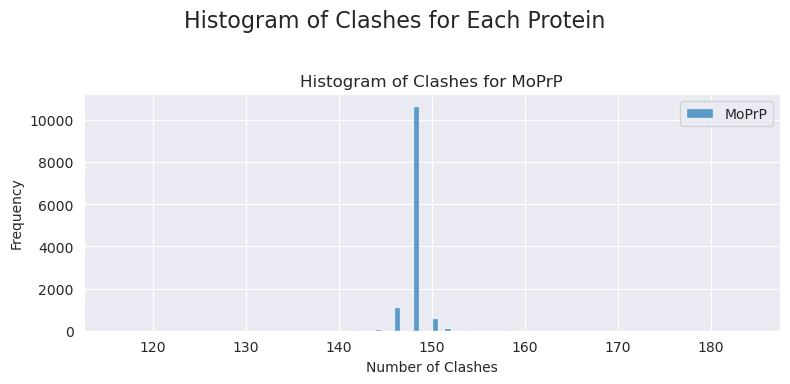

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom style for the plot
sns.set_style("darkgrid")
# sns.set_palette("viridis", len(protein_names))

# Create a figure with subplots for each protein
fig, axes = plt.subplots(nrows=len(protein_names), ncols=1, figsize=(8, 4*len(protein_names)), sharex=False)

# Iterate over each protein and plot the histogram on a separate subplot
for i, protein in enumerate(protein_names):
    ax = axes
    clashes = clashes_df[clashes_df["protein"] == protein]["clashes"].values[0]
    
    ax.hist(clashes, bins=100, alpha=0.7, label=protein, color=f"C{i}")
    
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram of Clashes for {protein}")
    ax.legend()
    
    # ax.set_yscale("log")
    # ax.set_xscale("log")
    
    # Set x-axis label only for the bottom subplot
    if i == len(protein_names) - 1:
        ax.set_xlabel("Number of Clashes")
    
    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.4)

# Add a main title for the entire figure
fig.suptitle("Histogram of Clashes for Each Protein", fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the spacing at the top to accommodate the main title
plt.show()

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


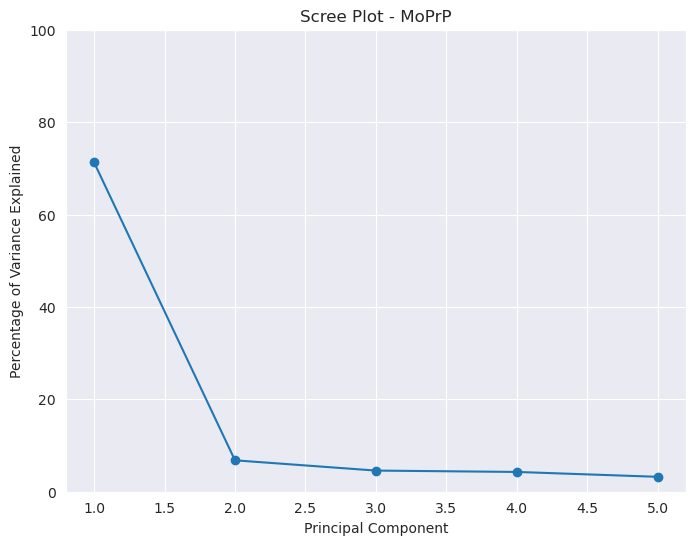

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def calculate_pca(universe, num_components=100, residues:list=None, ref_frame_index:int=0):
    sel = "protein and name CA"
    if residues is not None:
        resi_sel = " or".join([f" resid {res}" for res in residues])
        sel = sel + f" and ({resi_sel})"

    universe.trajectory[ref_frame_index]
    ref = universe.select_atoms(sel)

    alignment = mda.analysis.align.AlignTraj(universe, ref, select=sel, in_memory=True).run()

    n_frames = len(universe.trajectory)
    n_residues = len(ref.residues)

    calc_intra_residue_dist = np.zeros((n_frames, n_residues*(n_residues-1)//2))

    for i, ts in enumerate(universe.trajectory):
        coords = ref.positions
        calc_intra_residue_dist[i] = pdist(coords)

    pca = PCA(n_components=num_components)
    pca.fit(calc_intra_residue_dist)
    data = pca.transform(calc_intra_residue_dist)
    explained_variance_ratio = pca.explained_variance_ratio_
    
        # Plot the percentage of variance explained for each dimension
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, n_dims+1), explained_variance_ratio*100, marker='o')
    plt.xlabel('Principal Component')
    plt.ylabel('Percentage of Variance Explained')
    plt.title(f'Scree Plot - {protein}')
    plt.ylim(0, 100)
    plt.grid(True)
    plt.show()


    return data

pca_df = pd.DataFrame()
n_dims = 5

for protein in protein_names:
    ref_index = proteins[protein]["ref_index"]


    residues = res_data[protein]
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    pca = calculate_pca(universe, num_components=n_dims, residues=residues, ref_frame_index=ref_index)
    df_to_add = pd.DataFrame({"protein": protein, "pca": [pca], "n_dims": n_dims})
    pca_df = pd.concat([pca_df, df_to_add], axis=0)
    


In [16]:
import phate

def calculate_phate(universe, num_components=2, residues:list=None, ref_frame_index:int=0):
    sel = "protein and name CA"
    if residues is not None:
        resi_sel = " or".join([f" resid {res}" for res in residues])
        sel = sel + f" and ({resi_sel})"

    universe.trajectory[ref_frame_index]
    ref = universe.select_atoms(sel)

    alignment = mda.analysis.align.AlignTraj(universe, ref, select=sel, in_memory=True).run()

    n_frames = len(universe.trajectory)
    n_residues = len(ref.residues)

    # calculate the intrares distances of atomgroup for each frame
    calc_intra_residue_dist = np.zeros((n_frames, n_residues*(n_residues-1)//2))

    for i, ts in enumerate(universe.trajectory):
        coords = ref.positions
        calc_intra_residue_dist[i] = pdist(coords)

    phate_operator = phate.PHATE(n_components=num_components)
    data = phate_operator.fit_transform(calc_intra_residue_dist)
    return data

phate_df = pd.DataFrame()
n_dims = 2

for protein in protein_names:
    ref_index = proteins[protein]["ref_index"]

    residues = res_data[protein]
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    phate_embedding = calculate_phate(universe, num_components=n_dims, residues=residues, ref_frame_index=ref_index)
    df_to_add = pd.DataFrame({"protein": protein, "phate": [phate_embedding], "n_dims": n_dims})
    phate_df = pd.concat([phate_df, df_to_add], axis=0)

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


Calculating PHATE...
  Running PHATE on 12700 observations and 3081 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 20.51 seconds.
    Calculating KNN search...
    Calculated KNN search in 37.23 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 57.86 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 23.43 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.86 seconds.
  Calculated landmark operator in 28.85 seconds.
  Calculating optimal t...
    Automatically selected t = 44
  Calculated optimal t in 3.43 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.76 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 9.34 seconds.
Calculated PHATE in 100.28 seconds.


(12700,)
MoPrP
0.43


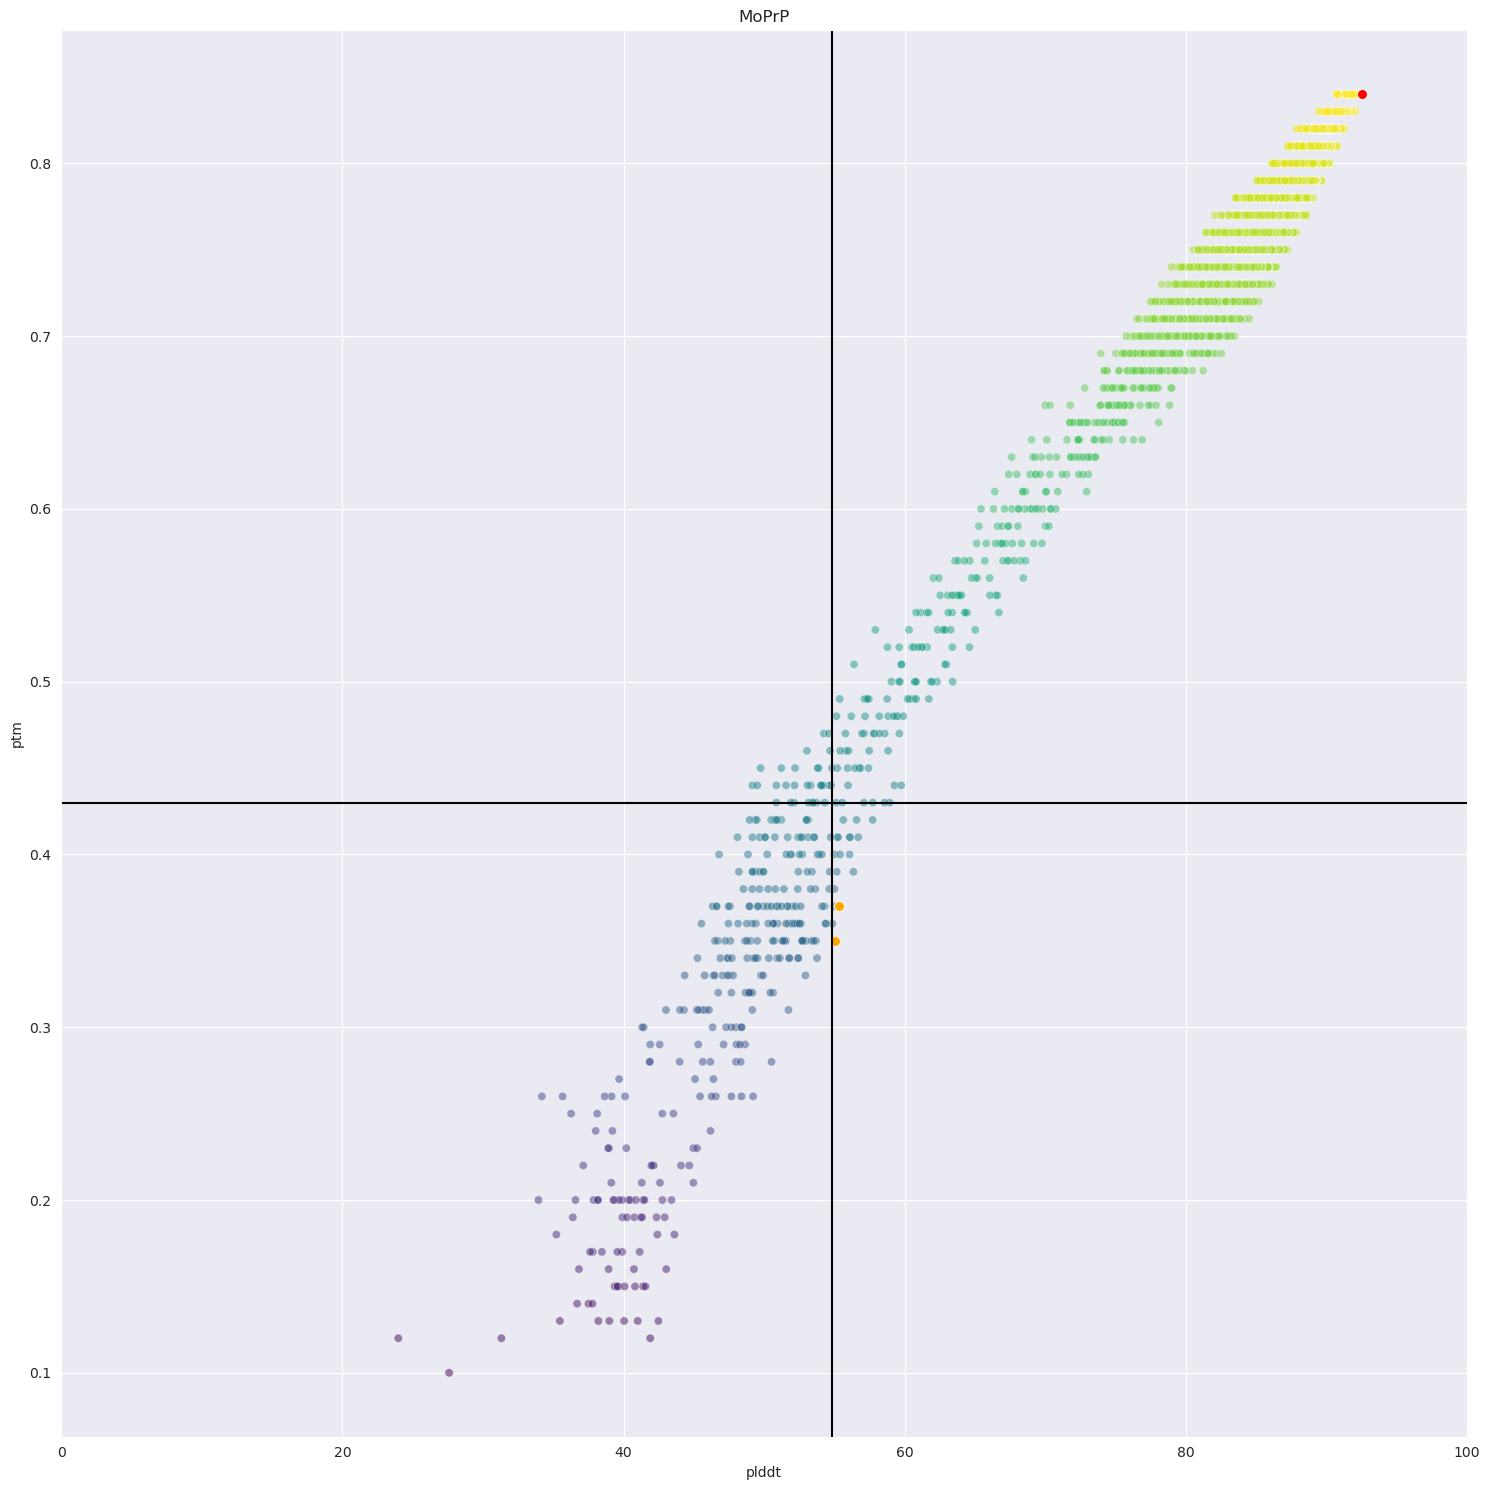

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# plot RMSD for each protein as a histogram

fig, ax = plt.subplots(len(protein_names), 1, figsize=(15, 15))


thresholds = conf_thresholds

for i, protein in enumerate(protein_names):
    contact_order = contact_order_df[contact_order_df["protein"] == protein]["contact_order"].values[0]
    print(contact_order.shape)
    print(protein)
    covariance = intra_residue_covariance_df[intra_residue_covariance_df["protein"] == protein]["intra_residue_covariance"].values[0]
    ptm = ptm_data[protein]
    max_pae = max_pae_data[protein]
    # det = intra_residue_det_df[intra_residue_det_df["protein"] == protein]["intra_residue_det"].values[0]
    # det = det/ det[0]
    # # make det all positive
    # # det = np.abs(det)
    # det = np.log(det)
    # print(np.mean(det))
    ref_index = proteins[protein]["ref_index"]

    plddt = plddt_data[protein]

    max_plddt_index = np.where(plddt == np.max(plddt))
    # print(len(det))
    max_pae_index = np.where(max_pae == np.max(max_pae))


    sns.scatterplot(x=plddt, y=ptm, ax=ax, alpha=0.5, c=ptm, cmap='viridis')
    # plot the 0th as a black dot
    sns.scatterplot(x=[plddt[ref_index]], y=[ptm[ref_index]], ax=ax, c="black",s=20)
    sns.scatterplot(x=plddt[max_plddt_index], y=ptm[max_plddt_index], ax=ax, c="red",s=50)
    sns.scatterplot(x=plddt[max_pae_index], y=ptm[max_pae_index], ax=ax, c="orange",s=50)

    # min_threshold

    ptm_threshold = np.percentile(ptm,thresholds[i][0])
    # max_threshold = np.percentile(plddt,100)
    plddt_threshold =np.percentile(plddt,thresholds[i][0])
    # ax.axvline(50)
    ax.axvline(plddt_threshold, c="black")

    ax.axhline(ptm_threshold, c="black")

    print(ptm_threshold)
    # print(np.min(contact_order))
    ax.set_title(protein)
    ax.set_xlabel("plddt")
    ax.set_ylabel("ptm")
    # ax.set_xscale("log")
    ax.set_xlim(0,100)


plt.tight_layout()

plt.show() 

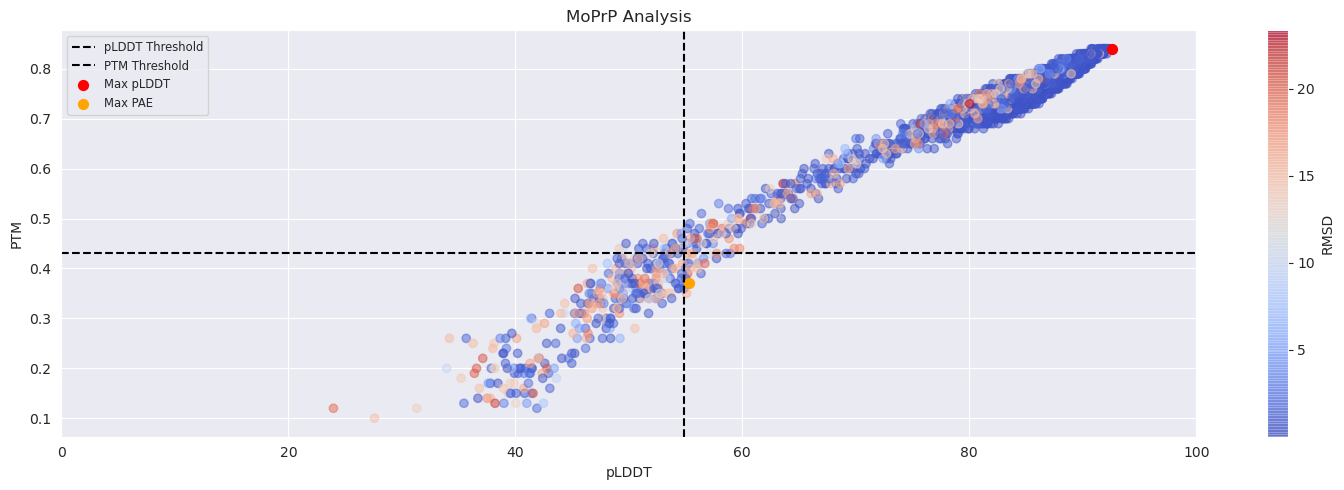

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_protein_data(protein_names, contact_order_df, intra_residue_covariance_df, 
                      ptm_data, max_pae_data, plddt_data, conf_thresholds):
    """
    Plot RMSD for each protein as a scatter plot with various metrics.
    
    Args:
    - protein_names: List of protein names
    - contact_order_df: DataFrame with contact order data
    - intra_residue_covariance_df: DataFrame with intra-residue covariance data
    - ptm_data: Dictionary of PTM data for each protein
    - max_pae_data: Dictionary of max PAE data for each protein
    - plddt_data: Dictionary of pLDDT data for each protein
    - conf_thresholds: List of confidence thresholds for each protein
    """
    fig, axes = plt.subplots(len(protein_names), 1, figsize=(15, 5*len(protein_names)))
    
    for i, protein in enumerate(protein_names):
        ax = axes[i] if len(protein_names) > 1 else axes
        
        # Extract data for the current protein
        contact_order = contact_order_df.loc[contact_order_df["protein"] == protein, "contact_order"].values[0]
        covariance = intra_residue_covariance_df.loc[intra_residue_covariance_df["protein"] == protein, "intra_residue_covariance"].values[0]
        ptm = ptm_data[protein]
        max_pae = max_pae_data[protein]
        plddt = plddt_data[protein]
        
        # Determine reference index
        # ref_index = 1 if protein == "BRD4" else 0
        
        # Find indices of maximum pLDDT and PAE
        max_plddt_index = np.argmax(plddt)
        max_pae_index = np.argmax(max_pae)
        rmsd= RMSD_df[RMSD_df["protein"] == protein]["RMSD"].values[0]
        # Create scatter plot
        scatter = ax.scatter(plddt, ptm, alpha=0.5, c=rmsd, cmap='coolwarm')
        # ax.scatter(plddt[ref_index], ptm[ref_index], c="black", s=20, label='Reference')
        ax.scatter(plddt[max_plddt_index], ptm[max_plddt_index], c="red", s=50, label='Max pLDDT')
        ax.scatter(plddt[max_pae_index], ptm[max_pae_index], c="orange", s=50, label='Max PAE')
        
        # Add threshold lines
        threshold = conf_thresholds[i][0]
        ptm_threshold = np.percentile(ptm, threshold)
        plddt_threshold = np.percentile(plddt, threshold)
        ax.axvline(plddt_threshold, c="black", linestyle='--', label='pLDDT Threshold')
        ax.axhline(ptm_threshold, c="black", linestyle='--', label='PTM Threshold')
        
        # Set labels and title
        ax.set_title(f"{protein} Analysis")
        ax.set_xlabel("pLDDT")
        ax.set_ylabel("PTM")
        ax.set_xlim(0, 100)
        
        # Add legend
        ax.legend(loc='best', fontsize='small')
        
        # Add colorbar
        plt.colorbar(scatter, ax=ax, label='RMSD')
        
    plt.tight_layout()
    return fig

# Assuming you have the following data structures defined:
# protein_names, contact_order_df, intra_residue_covariance_df, 
# ptm_data, max_pae_data, plddt_data, conf_thresholds

# Generate the plot
fig = plot_protein_data(protein_names, contact_order_df, intra_residue_covariance_df, 
                        ptm_data, max_pae_data, plddt_data, conf_thresholds)

# Show the plot
plt.show()

# Optionally, save the figure
# fig.savefig('protein_analysis.png', dpi=300, bbox_inches='tight')

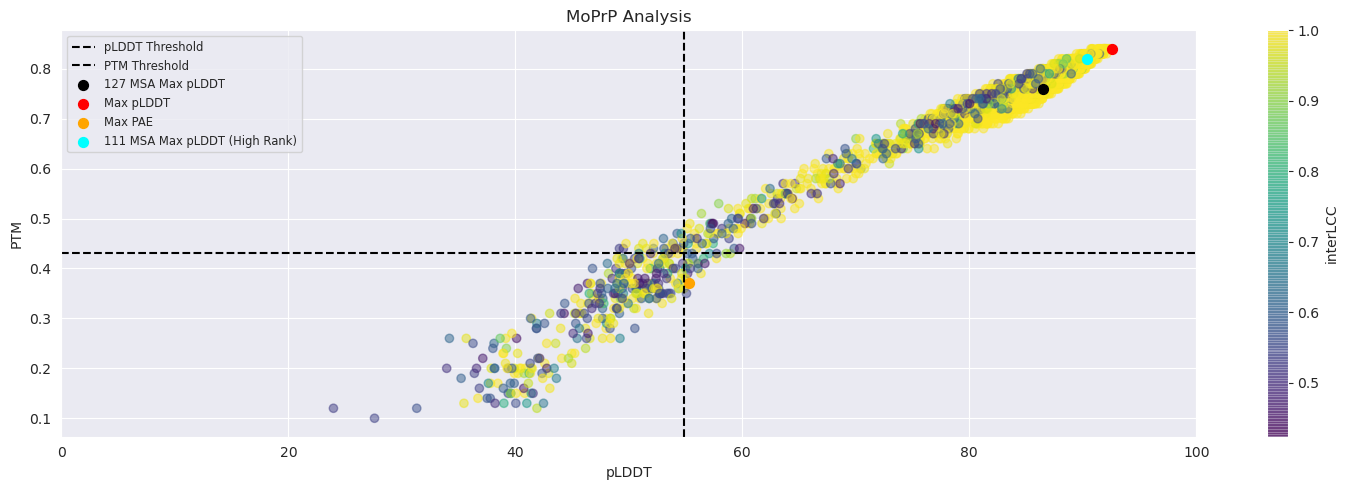

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_protein_data(protein_names, contact_order_df, intra_residue_covariance_df, 
                      ptm_data, max_pae_data, plddt_data, conf_thresholds):
    """
    Plot RMSD for each protein as a scatter plot with various metrics.
    
    Args:
    - protein_names: List of protein names
    - contact_order_df: DataFrame with contact order data
    - intra_residue_covariance_df: DataFrame with intra-residue covariance data
    - ptm_data: Dictionary of PTM data for each protein
    - max_pae_data: Dictionary of max PAE data for each protein
    - plddt_data: Dictionary of pLDDT data for each protein
    - conf_thresholds: List of confidence thresholds for each protein
    """
    fig, axes = plt.subplots(len(protein_names), 1, figsize=(15, 5*len(protein_names)))
    
    for i, protein in enumerate(protein_names):
        ax = axes[i] if len(protein_names) > 1 else axes
        
        # Extract data for the current protein
        contact_order = contact_order_df.loc[contact_order_df["protein"] == protein, "contact_order"].values[0]
        covariance = intra_residue_covariance_df.loc[intra_residue_covariance_df["protein"] == protein, "intra_residue_covariance"].values[0]
        ptm = ptm_data[protein]
        max_pae = max_pae_data[protein]
        plddt = plddt_data[protein]
        
        
        # Determine reference index
        ref_index = 1 if protein == "BRD4" else 0
        
        # Find indices of maximum pLDDT and PAE
        max_plddt_index = np.argmax(plddt)
        max_pae_index = np.argmax(max_pae)
        
        # Calculate high rank index
        high_rank_index = 1600 + ref_index
        
        # Create scatter plot
        scatter = ax.scatter(plddt, ptm, alpha=0.5, c=covariance, cmap='viridis')
        ax.scatter(plddt[ref_index], ptm[ref_index], c="black", s=50, label='127 MSA Max pLDDT')
        ax.scatter(plddt[max_plddt_index], ptm[max_plddt_index], c="red", s=50, label='Max pLDDT')
        ax.scatter(plddt[max_pae_index], ptm[max_pae_index], c="orange", s=50, label='Max PAE')
        ax.scatter(plddt[high_rank_index], ptm[high_rank_index], c="cyan", s=50, label='111 MSA Max pLDDT (High Rank)')
        
        # Add threshold lines
        threshold = conf_thresholds[i][0]
        ptm_threshold = np.percentile(ptm, threshold)
        plddt_threshold = np.percentile(plddt, threshold)
        ax.axvline(plddt_threshold, c="black", linestyle='--', label='pLDDT Threshold')
        ax.axhline(ptm_threshold, c="black", linestyle='--', label='PTM Threshold')
        
        # Set labels and title
        ax.set_title(f"{protein} Analysis")
        ax.set_xlabel("pLDDT")
        ax.set_ylabel("PTM")
        ax.set_xlim(0, 100)
        
        # Add legend
        ax.legend(loc='best', fontsize='small')
        
        # Add colorbar
        plt.colorbar(scatter, ax=ax, label='interLCC')
        
    plt.tight_layout()
    return fig

# Assuming you have the following data structures defined:
# protein_names, contact_order_df, intra_residue_covariance_df, 
# ptm_data, max_pae_data, plddt_data, conf_thresholds

# Generate the plot
fig = plot_protein_data(protein_names, contact_order_df, intra_residue_covariance_df, 
                        ptm_data, max_pae_data, plddt_data, conf_thresholds)

# Show the plot
plt.show()

# Optionally, save the figure
fig.savefig('proteins_plddtptm_analysis.png', dpi=300, bbox_inches='tight')

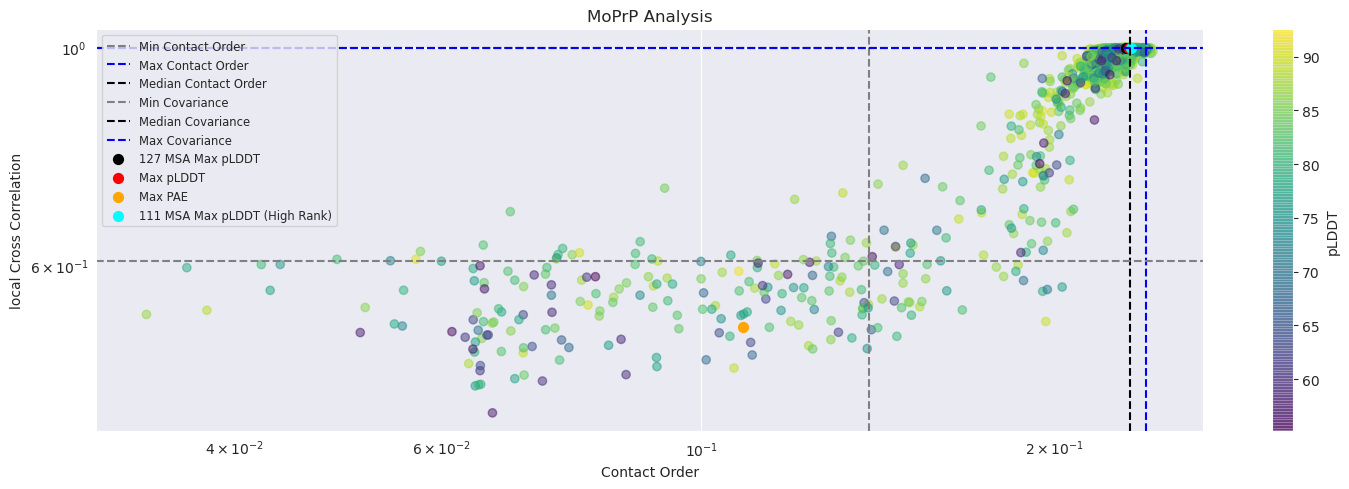

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_protein_contact_order_covariance(protein_names, contact_order_df, intra_residue_dist_df, 
                                          intra_residue_covariance_df, plddt_data, max_pae_data, 
                                          ptm_data, clashes_df, conf_thresholds, con_thresholds, 
                                          cov_thresholds):
    """
    Plot contact order vs covariance for each protein with various metrics.
    
    Args:
    - protein_names: List of protein names
    - contact_order_df, intra_residue_dist_df, intra_residue_covariance_df: DataFrames with respective data
    - plddt_data, max_pae_data, ptm_data: Dictionaries with respective data for each protein
    - clashes_df: DataFrame with clash data
    - conf_thresholds, con_thresholds, cov_thresholds: Lists of thresholds for each protein
    """
    fig, axes = plt.subplots(len(protein_names), 1, figsize=(15, 5*len(protein_names)))
    
    for i, protein in enumerate(protein_names):
        ax = axes[i] if len(protein_names) > 1 else axes
        
        # Extract data for the current protein
        contact_order = contact_order_df.loc[contact_order_df["protein"] == protein, "contact_order"].values[0]
        intra_res = intra_residue_dist_df.loc[intra_residue_dist_df["protein"] == protein, "intra_residue_dist"].values[0]
        covariance = intra_residue_covariance_df.loc[intra_residue_covariance_df["protein"] == protein, "intra_residue_covariance"].values[0]
        plddt = plddt_data[protein]
        max_pae = max_pae_data[protein]
        ptm = ptm_data[protein]
        clashes = clashes_df.loc[clashes_df["protein"] == protein, "clashes"].values[0]
        rmsd = RMSD_df.loc[RMSD_df["protein"] == protein, "RMSD"].values[0]
        # Determine reference index
        ref_index = 1 if protein == "BRD4" else 0
        
        # Calculate thresholds and masks
        plddt_threshold = np.percentile(plddt, conf_thresholds[i][0])
        ptm_threshold = np.percentile(ptm, conf_thresholds[i][0])
        plddt_mask = (plddt > plddt_threshold)
        ptm_mask = (ptm > ptm_threshold)
        combined_mask = plddt_mask & ptm_mask
        
        # Apply masks
        masked_contact_order = contact_order[combined_mask]
        masked_covariance = covariance[combined_mask]
        masked_intra_res = intra_res[combined_mask]
        masked_plddt = plddt[combined_mask]
        masked_rmsd = rmsd[combined_mask]
        # Find indices of maximum pLDDT and PAE
        max_plddt_index = np.argmax(plddt)
        max_pae_index = np.argmax(max_pae)
        
        # Calculate high rank index
        high_rank_index = 1600 + ref_index
        
        # Create scatter plot
        scatter = ax.scatter(masked_contact_order, masked_covariance, alpha=0.5, c=masked_plddt, cmap='viridis')
        ax.scatter(contact_order[ref_index], covariance[ref_index], c="black", s=50, label='127 MSA Max pLDDT')
        ax.scatter(contact_order[max_plddt_index], covariance[max_plddt_index], c="red", s=50, label='Max pLDDT')
        ax.scatter(contact_order[max_pae_index], covariance[max_pae_index], c="orange", s=50, label='Max PAE')
        ax.scatter(contact_order[high_rank_index], covariance[high_rank_index], c="cyan", s=50, label='111 MSA Max pLDDT (High Rank)')
        
        # Add threshold lines
        con_thresholds_list = list(con_thresholds[i]) + [50]
        for threshold, color, label in zip(con_thresholds_list, ['grey', 'blue', 'black'], 
                                           ['Min', 'Max', 'Median']):
            ax.axvline(np.percentile(masked_contact_order, threshold), c=color, linestyle='--', 
                       label=f'{label} Contact Order')
        
        cov_thresholds_list = list(cov_thresholds[i]) + [50, 100]
        for threshold, color, label in zip(cov_thresholds_list, ['grey', 'black', 'blue'], 
                                           ['Min', 'Median', 'Max']):
            ax.axhline(np.percentile(masked_covariance, threshold), c=color, linestyle='--', 
                       label=f'{label} Covariance')
        
        # Set labels and title
        ax.set_title(f"{protein} Analysis")
        ax.set_xlabel("Contact Order")
        ax.set_ylabel("local Cross Correlation")
        ax.set_yscale("log")
        ax.set_xscale("log")
        
        # Add legend
        ax.legend(loc='best', fontsize='small')
        
        # Add colorbar
        plt.colorbar(scatter, ax=ax, label='pLDDT')
        
    plt.tight_layout()
    return fig

# Assuming you have the following data structures defined:
# protein_names, contact_order_df, intra_residue_dist_df, intra_residue_covariance_df, 
# plddt_data, max_pae_data, ptm_data, clashes_df, conf_thresholds, con_thresholds, cov_thresholds

# Generate the plot
fig = plot_protein_contact_order_covariance(protein_names, contact_order_df, intra_residue_dist_df, 
                                            intra_residue_covariance_df, plddt_data, max_pae_data, 
                                            ptm_data, clashes_df, conf_thresholds, con_thresholds, 
                                            cov_thresholds)

# Show the plot
plt.show()

# Optionally, save the figure
fig.savefig('protein_contact_order_covariance_analysis.png', dpi=300, bbox_inches='tight')

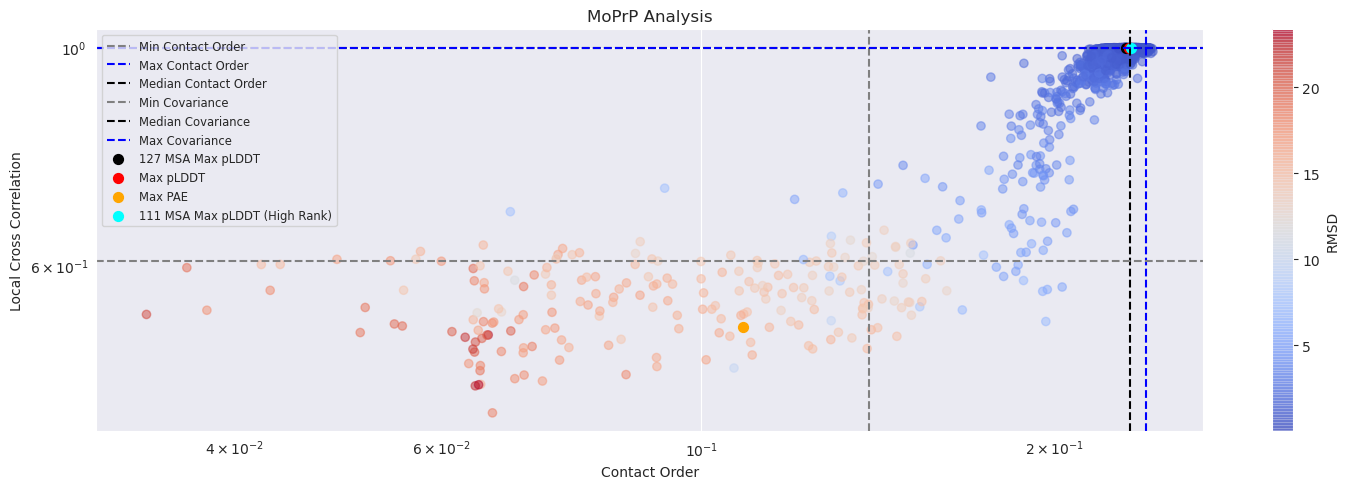

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_protein_contact_order_covariance(protein_names, contact_order_df, intra_residue_dist_df, 
                                          intra_residue_covariance_df, plddt_data, max_pae_data, 
                                          ptm_data, clashes_df, conf_thresholds, con_thresholds, 
                                          cov_thresholds):
    """
    Plot contact order vs covariance for each protein with various metrics.
    
    Args:
    - protein_names: List of protein names
    - contact_order_df, intra_residue_dist_df, intra_residue_covariance_df: DataFrames with respective data
    - plddt_data, max_pae_data, ptm_data: Dictionaries with respective data for each protein
    - clashes_df: DataFrame with clash data
    - conf_thresholds, con_thresholds, cov_thresholds: Lists of thresholds for each protein
    """
    fig, axes = plt.subplots(len(protein_names), 1, figsize=(15, 5*len(protein_names)))
    
    for i, protein in enumerate(protein_names):
        ax = axes[i] if len(protein_names) > 1 else axes
        
        # Extract data for the current protein
        contact_order = contact_order_df.loc[contact_order_df["protein"] == protein, "contact_order"].values[0]
        intra_res = intra_residue_dist_df.loc[intra_residue_dist_df["protein"] == protein, "intra_residue_dist"].values[0]
        covariance = intra_residue_covariance_df.loc[intra_residue_covariance_df["protein"] == protein, "intra_residue_covariance"].values[0]
        plddt = plddt_data[protein]
        max_pae = max_pae_data[protein]
        ptm = ptm_data[protein]
        clashes = clashes_df.loc[clashes_df["protein"] == protein, "clashes"].values[0]
        rmsd = RMSD_df.loc[RMSD_df["protein"] == protein, "RMSD"].values[0]
        # Determine reference index
        ref_index = 1 if protein == "BRD4" else 0
        
        # Calculate thresholds and masks
        plddt_threshold = np.percentile(plddt, conf_thresholds[i][0])
        ptm_threshold = np.percentile(ptm, conf_thresholds[i][0])
        plddt_mask = (plddt > plddt_threshold)
        ptm_mask = (ptm > ptm_threshold)
        combined_mask = plddt_mask & ptm_mask
        
        # Apply masks
        masked_contact_order = contact_order[combined_mask]
        masked_covariance = covariance[combined_mask]
        masked_intra_res = intra_res[combined_mask]
        masked_plddt = plddt[combined_mask]
        masked_rmsd = rmsd[combined_mask]
        # Find indices of maximum pLDDT and PAE
        max_plddt_index = np.argmax(plddt)
        max_pae_index = np.argmax(max_pae)
        
        # Calculate high rank index
        high_rank_index = 1600 + ref_index
        
        # Create scatter plot
        scatter = ax.scatter(masked_contact_order, masked_covariance, alpha=0.5, c=masked_rmsd, cmap='coolwarm')
        ax.scatter(contact_order[ref_index], covariance[ref_index], c="black", s=50, label='127 MSA Max pLDDT')
        ax.scatter(contact_order[max_plddt_index], covariance[max_plddt_index], c="red", s=50, label='Max pLDDT')
        ax.scatter(contact_order[max_pae_index], covariance[max_pae_index], c="orange", s=50, label='Max PAE')
        ax.scatter(contact_order[high_rank_index], covariance[high_rank_index], c="cyan", s=50, label='111 MSA Max pLDDT (High Rank)')
        
        # Add threshold lines
        con_thresholds_list = list(con_thresholds[i]) + [50]
        for threshold, color, label in zip(con_thresholds_list, ['grey', 'blue', 'black'], 
                                           ['Min', 'Max', 'Median']):
            ax.axvline(np.percentile(masked_contact_order, threshold), c=color, linestyle='--', 
                       label=f'{label} Contact Order')
        
        cov_thresholds_list = list(cov_thresholds[i]) + [50, 100]
        for threshold, color, label in zip(cov_thresholds_list, ['grey', 'black', 'blue'], 
                                           ['Min', 'Median', 'Max']):
            ax.axhline(np.percentile(masked_covariance, threshold), c=color, linestyle='--', 
                       label=f'{label} Covariance')
        
        # Set labels and title
        ax.set_title(f"{protein} Analysis")
        ax.set_xlabel("Contact Order")
        ax.set_ylabel("Local Cross Correlation")
        ax.set_yscale("log")
        ax.set_xscale("log")
        
        # Add legend
        ax.legend(loc='best', fontsize='small')
        
        # Add colorbar
        plt.colorbar(scatter, ax=ax, label='RMSD')
        
    plt.tight_layout()
    return fig

# Assuming you have the following data structures defined:
# protein_names, contact_order_df, intra_residue_dist_df, intra_residue_covariance_df, 
# plddt_data, max_pae_data, ptm_data, clashes_df, conf_thresholds, con_thresholds, cov_thresholds

# Generate the plot
fig = plot_protein_contact_order_covariance(protein_names, contact_order_df, intra_residue_dist_df, 
                                            intra_residue_covariance_df, plddt_data, max_pae_data, 
                                            ptm_data, clashes_df, conf_thresholds, con_thresholds, 
                                            cov_thresholds)

# Show the plot
plt.show()

# Optionally, save the figure
fig.savefig('protein_contact_order_covariance_analysis.png', dpi=300, bbox_inches='tight')

(12700,)
MoPrP


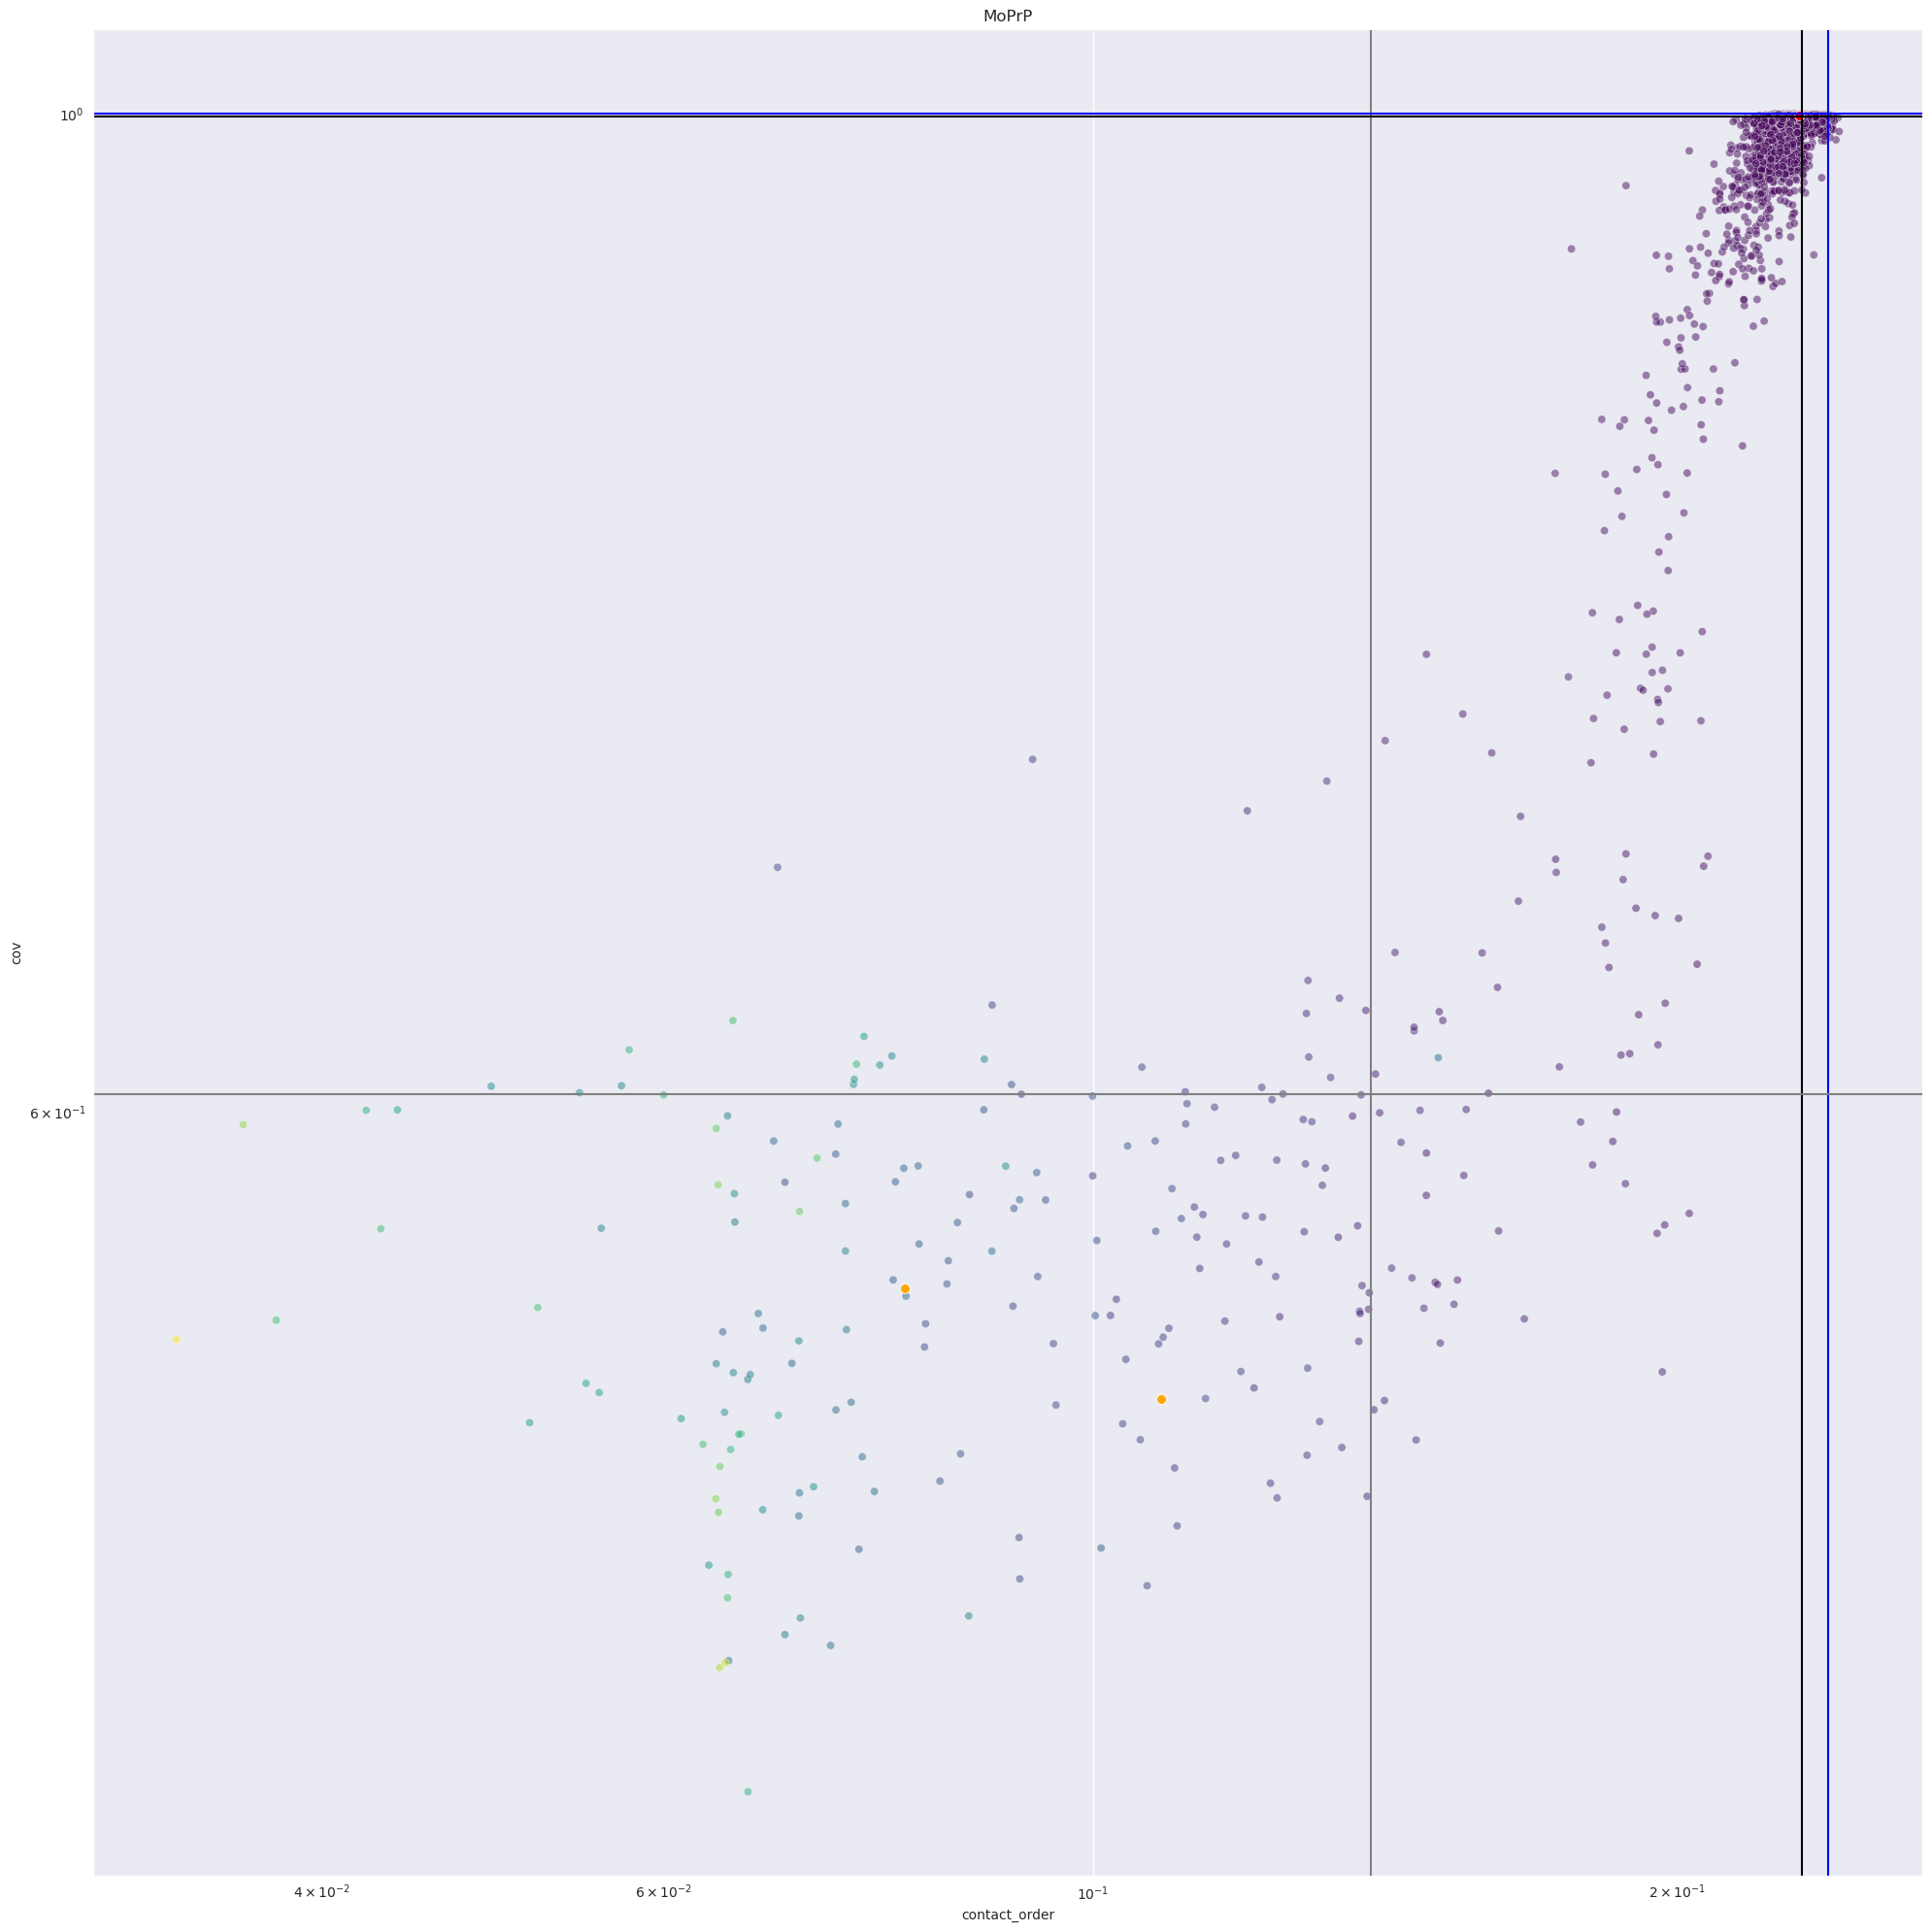

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# plot RMSD for each protein as a histogram
conf_thresholds = conf_thresholds

fig, ax = plt.subplots(len(protein_names), 1, figsize=(20, 20))
thresholds = con_thresholds
cov_thresholds = cov_thresholds

for i, protein in enumerate(protein_names):
    contact_order = contact_order_df[contact_order_df["protein"] == protein]["contact_order"].values[0]
    print(contact_order.shape)
    print(protein)
    intra_res = intra_residue_dist_df[intra_residue_dist_df["protein"]==protein]["intra_residue_dist"].values[0]
    covariance = intra_residue_covariance_df[intra_residue_covariance_df["protein"] == protein]["intra_residue_covariance"].values[0]
    plddt = plddt_data[protein]
    max_pae = max_pae_data[protein]
    ptm = ptm_data[protein]
    clashes = clashes_df[clashes_df["protein"] == protein]["clashes"].values[0]
    # det = intra_residue_det_df[intra_residue_det_df["protein"] == protein]["intra_residue_det"].values[0]
    # det = det/ det[0]
    # # make det all positive
    # # det = np.abs(det)
    # det = np.log(det)
    # print(np.mean(det))
    plddt = plddt_data[protein]
    # ptm = 
    # print(len(det))    
    ref_index = proteins[protein]["ref_index"]

    plddt = plddt_data[protein]

    max_plddt_index = np.where(plddt == np.max(plddt))


    plddt_threshold = np.percentile(plddt,conf_thresholds[i][0])
    ptm_threshold =  np.percentile(ptm,conf_thresholds[i][0])
    
        # Create a mask for plddt values below the threshold
    plddt_mask = (plddt > plddt_threshold)

    # Create a mask for ptm values below the threshold
    ptm_mask = (ptm > ptm_threshold)

    # Combine the masks to exclude frames that are below the threshold for either
    combined_mask = plddt_mask & ptm_mask

    masked_contact_order = contact_order[combined_mask]
    masked_covariance = covariance[combined_mask]


    max_pae_index = np.where(max_pae == np.max(max_pae))

    sns.scatterplot(x=masked_contact_order, y=masked_covariance, ax=ax, alpha=0.5, c=intra_residue_dist[combined_mask], cmap='viridis')
    # plot the 0th as a black dot
    sns.scatterplot(x=[contact_order[ref_index]], y=[covariance[ref_index]], ax=ax, c="black")
    sns.scatterplot(x=contact_order[max_plddt_index], y=covariance[max_plddt_index], ax=ax, c="red",s=50)
    sns.scatterplot(x=contact_order[max_pae_index], y=covariance[max_pae_index], ax=ax, c="orange",s=50)

    max_threshold = np.percentile(masked_contact_order,thresholds[i][1])
    min_threshold = np.percentile(masked_contact_order,thresholds[i][0])

    med_threshold =np.percentile(masked_contact_order,50)
    ax.axvline(max_threshold,c="blue")
    ax.axvline(min_threshold,c="grey")
    ax.axvline(med_threshold,c="black")


    max_threshold = np.percentile(masked_covariance,100)
    min_threshold = np.percentile(masked_covariance,cov_thresholds[i][0])

    med_threshold =np.percentile(masked_covariance,50)
    ax.axhline(max_threshold,c="blue")
    ax.axhline(min_threshold,c="grey")
    ax.axhline(med_threshold,c="black")#, linewidth=10)
    



    ax.set_title(protein)
    ax.set_xlabel("contact_order")
    ax.set_ylabel("cov")
    ax.set_yscale("log")
    ax.set_xscale("log")


plt.tight_layout()

plt.show() 

In [34]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a 3D plot for each protein
fig = make_subplots(
    rows=len(protein_names), cols=1,
    specs=[[{'type': 'scatter'}] for _ in range(len(protein_names))],  # Changed 'scene' to 'scatter'
    subplot_titles=protein_names,
    vertical_spacing=0.05
)





for i, protein in enumerate(protein_names):
    intra_residue_dists = intra_residue_dist_df[intra_residue_dist_df["protein"]==protein]["intra_residue_dist"].values[0]
    rmsd = RMSD_df[RMSD_df["protein"] == protein]["RMSD"].values[0]
    plddt = plddt_data[protein]
    max_pae = max_pae_data[protein]
    ptm = ptm_data[protein]
    c = contact_order_df[contact_order_df["protein"] == protein]["contact_order"].values[0]
    covariance = intra_residue_covariance_df[intra_residue_covariance_df["protein"] == protein]["intra_residue_covariance"].values[0]
    pca = pca_df[pca_df["protein"]==protein]["pca"].values[0]

    clashes = clashes_df[clashes_df["protein"] == protein]["clashes"].values[0]
   
    plddt_threshold = np.percentile(plddt,conf_thresholds[i][0])
    ptm_threshold =  np.percentile(ptm,conf_thresholds[i][0])
    


    # labels = []    
    # for idx, pt in enumerate(ptm):
    #     pl = plddt[idx]
    #     con = contact_order[idx]
    #     cov = covariance[idx]

    #     if (pl < plddt_threshold and pt < ptm_threshold):
    #         label = 0
    #     elif (con < min_con) or (con > max_con):
    #         label = 0
    #     elif(cov < min_cov):
    #         label = 0
    #     # elif pt < ptm_threshold:
    #     #     label = 0.4
    #     else:
    #         label = 1
     
    #     labels.append(label)
    # labels = np.array(labels)

    plddt_threshold = np.percentile(plddt,conf_thresholds[i][0])
    ptm_threshold =  np.percentile(ptm,conf_thresholds[i][0])
    
        # Create a mask for plddt values below the threshold
    plddt_mask = (plddt > plddt_threshold)

    # Create a mask for ptm values below the threshold
    ptm_mask = (ptm > ptm_threshold)

    # Combine the masks 
    combined_mask = plddt_mask & ptm_mask

    masked_contact_order = contact_order[combined_mask]
    masked_covariance = covariance[combined_mask]
    masked_intra_residue_dists = intra_residue_dists[combined_mask]
    # masked_pca = pca[combined_mask]

    max_cov = np.percentile(covariance,100)
    mean_cov = np.mean(covariance)

    min_cov = np.percentile(covariance,1)
    # print(max_cov)
    # print(min_cov)
    cov_threshold = np.percentile(masked_covariance,cov_thresholds[i][0])

    median_con = np.median(masked_contact_order)
    mean_con = np.mean(masked_contact_order)
    max_con = np.percentile(masked_contact_order, con_thresholds[i][1])
    mean_con = np.mean(masked_contact_order)

    min_con = np.percentile(masked_contact_order,con_thresholds[i][0])

    min_con_mask = (masked_contact_order > min_con)
    max_con_mask = (masked_contact_order < max_con)

    con_mask = min_con_mask & max_con_mask

    cov_mask = (masked_covariance > cov_threshold)

    # 
    con_cov_mask = con_mask & cov_mask

    masked_intra_residue_dists = intra_residue_dists[combined_mask][con_cov_mask]


    min_dist =  np.percentile(masked_intra_residue_dists,res_thresholds[i][0])
    max_dist = np.percentile(masked_intra_residue_dists,res_thresholds[i][1])
    
    min_dist_mask = (masked_intra_residue_dists > min_dist)
    max_dist_mask = (masked_intra_residue_dists < max_dist)


    dist_mask = min_dist_mask & max_dist_mask

    # dist_con_cov_mask = np.logical_or(dist_mask,con_cov_mask)
    feats_all = pca
    
    _pca= pca[combined_mask][con_cov_mask][dist_mask]

    _pca1 = _pca[:,0]
    _pca2 = _pca[:,1]
    
    pca1 = pca[:,0]
    pca2 = pca[:,1]



    trace = go.Scatter(
        x=_pca1,
        y=_pca2,
        mode='markers',
        marker=dict(
            size=5,
            color=intra_residue_dist[combined_mask][con_cov_mask],
            colorscale='Viridis',
            opacity=0.5,
            colorbar=dict(  # Added colorbar
                title='Label',
                len=0.8,
                thickness=20,
            )
        ),
        name=protein,
        hovertemplate='Element: %{pointNumber}<br>PCA1: %{x:.2f}<br>PCA2: %{y:.2f}<extra></extra>'
    )

    fig.add_trace(trace, row=i+1, col=1)
    

    pca_indexes = np.where(con_cov_mask)[0]
    print(pca_indexes)
    


    trace = go.Scatter(
        x=_pca1[:,0],
        y=_pca1[:,1],
        mode='markers',
        marker=dict(
            size=7,
            color="Grey",
            # colorscale='Viridis',
            opacity=0.5,
            colorbar=dict(  # Added colorbar
                title='Label',
                len=0.8,
                thickness=20,
            )
        ),
        name=protein,
        hovertemplate='Element: %{pointNumber}<br>PCA1: %{x:.2f}<br>PCA2: %{y:.2f}<extra></extra>'
    )

    fig.add_trace(trace, row=i+1, col=1)


        
    max_plddt_index = np.where(plddt == np.max(plddt))
    print("Max plddt index", max_plddt_index)
    # plot max plddt as a orange 
    trace = go.Scatter(
        x=pca1[max_plddt_index],
        y=pca2[max_plddt_index],
        mode='markers',
        marker=dict(
            size=10,
            color="red",
            # colorscale='Viridis',
            opacity=0.8,
        ),
    
        name=protein,
        hovertemplate='Element: %{pointNumber}<br>PCA1: %{x:.2f}<br>PCA2: %{y:.2f}<extra></extra>'

    )

    fig.add_trace(trace, row=i+1, col=1)


    # plot max plddt as a orange 
    trace = go.Scatter(
        x=[pca1[0]],
        y=[pca2[0]],
        mode='markers',
        marker=dict(
            size=10,
            color="black",
            # colorscale='Viridis',
            opacity=0.8,
        ),
    
        name=protein,
        hovertemplate='Element: %{pointNumber}<br>PCA1: %{x:.2f}<br>PCA2: %{y:.2f}<extra></extra>'

    )

    fig.add_trace(trace, row=i+1, col=1)


    max_pae_index = np.where(max_pae == np.max(max_pae))
    print("Max pae index", max_pae_index)

    # plot max plddt as a orange 
    trace = go.Scatter(
        x=pca1[max_pae_index],
        y=pca2[max_pae_index],
        mode='markers',
        marker=dict(
            size=10,
            color="orange",
            # colorscale='Viridis',
            opacity=0.8,
        ),
    
        name=protein,
        hovertemplate='Element: %{pointNumber}<br>PCA1: %{x:.2f}<br>PCA2: %{y:.2f}<extra></extra>'

    )

    fig.add_trace(trace, row=i+1, col=1)



    fig.update_xaxes(title_text='PCA1', row=i+1, col=1)  # Updated axis title
    fig.update_yaxes(title_text='PCA2', row=i+1, col=1)  # Updated axis title

fig.update_layout(
    height=300 * len(protein_names),
    width=800,
    title_text='2D Scatter Plot of PCA1 and PCA2',
    showlegend=False
)

fig.show()

[    0     1     2 ... 12349 12351 12356]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [27]:
# plot PCA of all data for each protein coloured by each of the features: plddt, contact_order, cov, intra_residue_dist


In [35]:
from sklearn.cluster import KMeans

all_masks_frames = {}
all_masks_labels = {}
all_masks_indexes = {}
con_cov_masks_frames = {}
conf_masks_frames = {}
no_mask_frames = {}




for i, protein in enumerate(protein_names):
    intra_residue_dists = intra_residue_dist_df[intra_residue_dist_df["protein"]==protein]["intra_residue_dist"].values[0]
    rmsd = RMSD_df[RMSD_df["protein"] == protein]["RMSD"].values[0]
    plddt = plddt_data[protein]
    max_pae = max_pae_data[protein]
    ptm = ptm_data[protein]
    c = contact_order_df[contact_order_df["protein"] == protein]["contact_order"].values[0]
    covariance = intra_residue_covariance_df[intra_residue_covariance_df["protein"] == protein]["intra_residue_covariance"].values[0]
    pca = pca_df[pca_df["protein"]==protein]["pca"].values[0]
    clashes = clashes_df[clashes_df["protein"] == protein]["clashes"].values[0]

   
    plddt_threshold = np.percentile(plddt,conf_thresholds[i][0])
    ptm_threshold =  np.percentile(ptm,conf_thresholds[i][0])
    


    # labels = []    
    # for idx, pt in enumerate(ptm):
    #     pl = plddt[idx]
    #     con = contact_order[idx]
    #     cov = covariance[idx]

    #     if (pl < plddt_threshold and pt < ptm_threshold):
    #         label = 0
    #     elif (con < min_con) or (con > max_con):
    #         label = 0
    #     elif(cov < min_cov):
    #         label = 0
    #     # elif pt < ptm_threshold:
    #     #     label = 0.4
    #     else:
    #         label = 1
     
    #     labels.append(label)
    # labels = np.array(labels)

    plddt_threshold = np.percentile(plddt,conf_thresholds[i][0])
    ptm_threshold =  np.percentile(ptm,conf_thresholds[i][0])
    
        # Create a mask for plddt values below the threshold
    plddt_mask = (plddt > plddt_threshold)

    # Create a mask for ptm values below the threshold
    ptm_mask = (ptm > ptm_threshold)

    # Combine the masks 
    combined_mask = plddt_mask & ptm_mask

    masked_contact_order = contact_order[combined_mask]
    masked_covariance = covariance[combined_mask]
    masked_intra_residue_dists = intra_residue_dists[combined_mask]
    # masked_pca = pca[combined_mask]

    # max_cov = np.percentile(covariance,100)
    # mean_cov = np.mean(covariance)

    # min_cov = np.percentile(covariance,1)
    # print(max_cov)
    # print(min_cov)
    cov_threshold = np.percentile(masked_covariance,cov_thresholds[i][0])

    median_con = np.median(masked_contact_order)
    mean_con = np.mean(masked_contact_order)
    max_con = np.percentile(masked_contact_order, con_thresholds[i][1])
    mean_con = np.mean(masked_contact_order)

    min_con = np.percentile(masked_contact_order,con_thresholds[i][0])

    min_con_mask = (masked_contact_order > min_con)
    max_con_mask = (masked_contact_order < max_con)

    con_mask = min_con_mask & max_con_mask

    cov_mask = (masked_covariance > cov_threshold)

    # 
    con_cov_mask = con_mask & cov_mask

    masked_intra_residue_dists = intra_residue_dists[combined_mask][con_cov_mask]


    min_dist =  np.percentile(masked_intra_residue_dists,res_thresholds[i][0])
    max_dist = np.percentile(masked_intra_residue_dists,res_thresholds[i][1])
    
    min_dist_mask = (masked_intra_residue_dists > min_dist)
    max_dist_mask = (masked_intra_residue_dists < max_dist)


    dist_mask = min_dist_mask & max_dist_mask

    masked_clashes = clashes[combined_mask][con_cov_mask][dist_mask]

    max_clash = np.percentile(masked_clashes,95)
    print(max_clash)
    clash_mask = (masked_clashes <= max_clash)
    print(clash_mask)
    print(np.sum(clash_mask))
    # labels = []    
    # for idx, pt in enumerate(ptm):
    #     pl = plddt[idx]
    # Rest of the code...
    feats= pca[combined_mask][con_cov_mask][dist_mask][clash_mask]
    
    

    feats_con = pca[combined_mask][con_cov_mask]

    feats_conf = pca[combined_mask]

    feats_all = pca 
    # feat2 = pca2[combined_mask][con_cov_mask][dist_mask]



    kmeans = KMeans(n_clusters=k_clusters, random_state=42)

    kmeans.fit(feats_all)

    # Get the cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Find the closest frames to each cluster center
    closest_frames = kmeans.transform(feats_all).argmin(axis=0)

    no_mask_frames[protein] = closest_frames


    kmeans.fit(feats_con)

    # Get the cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Find the closest frames to each cluster center
    closest_frames = kmeans.transform(feats_con).argmin(axis=0)

    con_cov_masks_frames[protein] = closest_frames




    kmeans.fit(feats_conf)

    # Get the cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Find the closest frames to each cluster center
    closest_frames = kmeans.transform(feats_conf).argmin(axis=0)

    conf_masks_frames[protein] = closest_frames






    kmeans.fit(feats)

    # Get the cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Find the closest frames to each cluster center
    closest_frames = kmeans.transform(feats).argmin(axis=0)

    # get indexes of the final frames included in the mask
    all_masks_frame_indexes = np.where(combined_mask)[0][con_cov_mask][dist_mask][clash_mask]
    print(len(all_masks_frame_indexes))
    all_masks_indexes[protein] = all_masks_frame_indexes

    all_masks_frames[protein] = closest_frames
    all_masks_labels[protein] = kmeans.labels_
    # Print the indices of the closest frames for each cluster center
    for i, frame_idx in enumerate(closest_frames):
        print(f"Cluster {i+1}: Frame {frame_idx}")
    print(len(feats))




150.0
[ True  True  True ...  True  True  True]
11938


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



11938
Cluster 1: Frame 1659
Cluster 2: Frame 10808
Cluster 3: Frame 640
Cluster 4: Frame 11534
Cluster 5: Frame 11072
Cluster 6: Frame 3922
Cluster 7: Frame 11906
Cluster 8: Frame 2447
Cluster 9: Frame 8802
Cluster 10: Frame 1547
Cluster 11: Frame 2326
Cluster 12: Frame 11422
Cluster 13: Frame 3941
Cluster 14: Frame 1448
Cluster 15: Frame 11604
Cluster 16: Frame 11771
Cluster 17: Frame 471
Cluster 18: Frame 3000
Cluster 19: Frame 2117
Cluster 20: Frame 11481
11938


In [ ]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

150.0
Percentage of frames with clashes above 150.0 for MoPrP: 0.00%
Percentage of frames with clashes above 5 for MoPrP: 100.00%


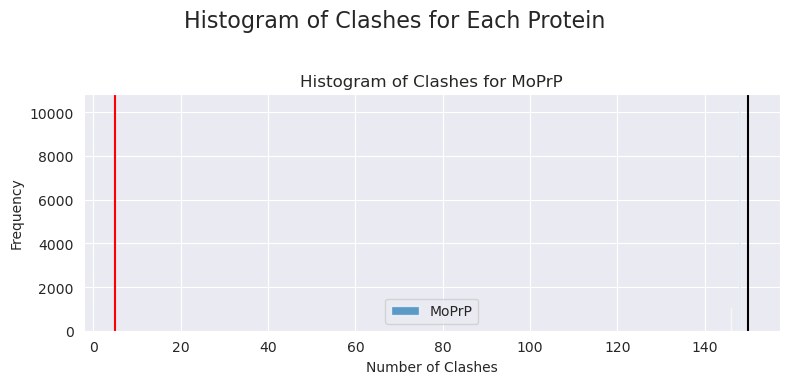

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom style for the plot
sns.set_style("darkgrid")
# sns.set_palette("viridis", len(protein_names))

# Create a figure with subplots for each protein
fig, axes = plt.subplots(nrows=len(protein_names), ncols=1, figsize=(8, 4*len(protein_names)), sharex=False)
clash_thresholds = [(0.5,99),(0.5,99),(0.5,99),(0.5,99),(0.5,99)]
# Iterate over each protein and plot the histogram on a separate subplot
for i, protein in enumerate(protein_names):
    ax = axes
    clashes = clashes_df[clashes_df["protein"] == protein]["clashes"].values[0]
    frame_mask = all_masks_indexes[protein]
    ax.hist(clashes[frame_mask], bins=100, alpha=0.7, label=protein, color=f"C{i}")
    
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram of Clashes for {protein}")
    ax.legend()
    # ax.set_yscale("log")
    # ax.set_xscale("log")
    
    max_clash = np.percentile(clashes[frame_mask],100)
    print(max_clash)

    n_residues = len(res_data[protein])

    sqrt_res = np.sqrt(n_residues)

    res_clash_threshold = sqrt_res//2
    res_clash_threshold = 5
    ax.axvline(res_clash_threshold, c="red")


    ax.axvline(max_clash, c="black")

    # calculate the percentage of frames above the threshold
    above_threshold = np.sum(clashes[frame_mask] > max_clash) / len(clashes[frame_mask]) * 100
    print(f"Percentage of frames with clashes above {max_clash} for {protein}: {above_threshold:.2f}%")

    above_threshold = np.sum(clashes[frame_mask] > res_clash_threshold) / len(clashes[frame_mask]) * 100
    print(f"Percentage of frames with clashes above {res_clash_threshold} for {protein}: {above_threshold:.2f}%")

    # Set x-axis label only for the bottom subplot
    if i == len(protein_names) - 1:
        ax.set_xlabel("Number of Clashes")
    
    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.4)

# Add a main title for the entire figure
fig.suptitle("Histogram of Clashes for Each Protein", fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the spacing at the top to accommodate the main title
plt.show()

(11938, 5)


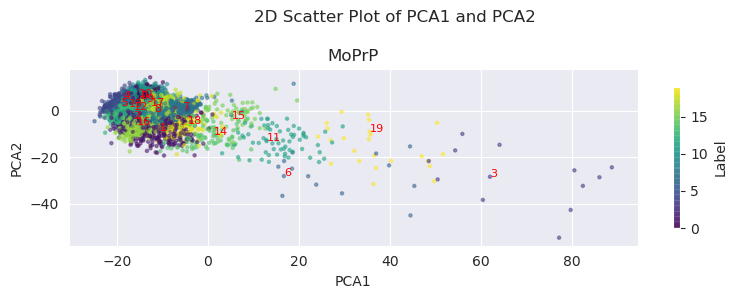

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D plot for each protein
fig, axes = plt.subplots(len(protein_names), 1, figsize=(8, 3*len(protein_names)), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)

for i, protein in enumerate(protein_names):
    intra_residue_dists = intra_residue_dist_df[intra_residue_dist_df["protein"]==protein]["intra_residue_dist"].values[0]
    rmsd = RMSD_df[RMSD_df["protein"] == protein]["RMSD"].values[0]
    plddt = plddt_data[protein]
    
    max_pae = max_pae_data[protein]
    ptm = ptm_data[protein]



    
    c = contact_order_df[contact_order_df["protein"] == protein]["contact_order"].values[0]
    covariance = intra_residue_covariance_df[intra_residue_covariance_df["protein"] == protein]["intra_residue_covariance"].values[0]
    pca = pca_df[pca_df["protein"]==protein]["pca"].values[0]
    frame_mask = all_masks_indexes[protein]
    labels = all_masks_labels[protein]

    _pca = pca[frame_mask]
    print(_pca.shape)
    pca1 = _pca[:,0]
    pca2 = _pca[:,1]

    scatter = axes.scatter(pca1, pca2, c=labels, cmap='viridis', alpha=0.5, s=5)

    closest_frames = all_masks_frames[protein]
    if len(closest_frames) <= 25:
        # annotate each cluster_center with its cluster number
        for j, txt in enumerate(closest_frames):




            axes.annotate(j, (_pca[txt, 0], _pca[txt, 1]), fontsize=8, color='red')


            # axes.annotate(i, (new_cluster_centers[i, 0], new_cluster_centers[i, 1]), fontsize=8, color='red')
        



    axes.set_title(protein)
    axes.set_xlabel('PCA1')
    axes.set_ylabel('PCA2')

    # Add colorbar
    
    cbar = fig.colorbar(scatter, ax=axes, shrink=0.8)
    cbar.set_label('Label')

fig.suptitle('2D Scatter Plot of PCA1 and PCA2')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Create subplots for the scatter plot and dendrogram
fig = plt.figure(figsize=(12, 3*len(protein_names)))
gs = fig.add_gridspec(len(protein_names), 2, width_ratios=[2, 1])

for i, protein in enumerate(protein_names):
    break
    intra_residue_dists = intra_residue_dist_df[intra_residue_dist_df["protein"]==protein]["intra_residue_dist"].values[0]
    rmsd = RMSD_df[RMSD_df["protein"] == protein]["RMSD"].values[0]
    plddt = plddt_data[protein]
    max_pae = max_pae_data[protein]
    ptm = ptm_data[protein]
    c = contact_order_df[contact_order_df["protein"] == protein]["contact_order"].values[0]
    covariance = intra_residue_covariance_df[intra_residue_covariance_df["protein"] == protein]["intra_residue_covariance"].values[0]
    pca = pca_df[pca_df["protein"]==protein]["pca"].values[0]
    frame_mask = all_masks_indexes[protein]
    
    # Extract the PCA features for the frame_mask indices
    _pca = pca[frame_mask]
    
    # Perform hierarchical clustering
    n_clusters = 10  # Specify the desired number of clusters
    linkage_matrix = linkage(_pca, method='ward')
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(_pca)
    
    # Create scatter plot
    ax_scatter = fig.add_subplot(gs[i, 0])
    pca1 = _pca[:,0]
    pca2 = _pca[:,1]
    scatter = ax_scatter.scatter(pca1, pca2, c=labels, cmap='viridis', alpha=0.5, s=5)
    
    # Annotate each cluster center with its cluster number
    cluster_centers = []
    for j in range(n_clusters):
        cluster_points = _pca[labels == j]
        cluster_center = np.mean(cluster_points, axis=0)
        cluster_centers.append(cluster_center)
        ax_scatter.annotate(j, (cluster_center[0], cluster_center[1]), fontsize=8, color='red')
    
    ax_scatter.set_title(protein)
    ax_scatter.set_xlabel('PCA1')
    ax_scatter.set_ylabel('PCA2')
    
    # Add colorbar
    cbar = fig.colorbar(scatter, ax=ax_scatter, shrink=0.8)
    cbar.set_label('Cluster')
    
    # Create dendrogram
    ax_dendrogram = fig.add_subplot(gs[i, 1])
    dendrogram(linkage_matrix, ax=ax_dendrogram)
    ax_dendrogram.set_title('Dendrogram')
    ax_dendrogram.set_xlabel('Sample Index')
    ax_dendrogram.set_ylabel('Distance')

fig.suptitle('2D Scatter Plot of PCA1 and PCA2 with Hierarchical Clustering and Dendrogram')
plt.tight_layout()
plt.show()

<Figure size 1200x1500 with 0 Axes>

In [36]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr
from MDAnalysis.analysis.align import AlignTraj

# def calc_intra_residue_cross_correlation(universe, frame_indexes, residues:list=None):
#     """
#     After aligning the trajectory in memory, calculate the cross correlation
#     of the intra-residue distances between the specified frame indexes.
#     """
#     sel = "protein and name CA"
#     if residues is not None:
#         resi_sel = " or ".join([f" resid {res}" for res in residues])
#         sel = sel + f" and ({resi_sel})"

#     ref = universe.select_atoms(sel)

#     # Align the trajectory to the first frame
#     alignment = AlignTraj(universe, ref, select=sel, in_memory=True).run()

#     n_frames = len(frame_indexes)
#     n_residues = len(ref.residues)

#     # Calculate the intra-residue distance matrices for the specified frames
#     dist_matrices = []
#     for frame_index in frame_indexes:
#         universe.trajectory[frame_index]
#         coords = ref.positions
#         dist_matrix = squareform(pdist(coords))
#         dist_matrices.append(dist_matrix)

#     # Calculate the cross correlation between the specified frames
#     cross_correlation_matrix = np.zeros((n_frames, n_frames))
#     for i in range(n_frames):
#         for j in range(n_frames):
#             cross_correlation_matrix[i, j] = pearsonr(dist_matrices[i].flatten(), dist_matrices[j].flatten())[0]

#     return cross_correlation_matrix


def calc_intra_residue_cross_correlation(universe, frame_indexes, residues:list=None, cutoff:float=8.0):
    """
    After aligning the trajectory in memory, calculate the local cross correlation
    of the intra-residue distances between the specified frame indexes, using a cutoff.
    A unique mask is created for each frame combination.
    """
    sel = "protein and name CA"
    if residues is not None:
        resi_sel = " or ".join([f"resid {res}" for res in residues])
        sel = sel + f" and ({resi_sel})"
    
    ref = universe.select_atoms(sel)
    
    # Align the trajectory to the first frame
    alignment = AlignTraj(universe, ref, select=sel, in_memory=True).run()
    
    n_frames = len(frame_indexes)
    n_residues = len(ref.residues)
    
    # Calculate the distance matrices for the specified frames
    dist_matrices = []
    for frame_index in frame_indexes:
        universe.trajectory[frame_index]
        coords = ref.positions
        dist_matrix = squareform(pdist(coords))
        dist_matrices.append(dist_matrix)
    
    # Calculate the local cross correlation between the specified frames
    cross_correlation_matrix = np.zeros((n_frames, n_frames))
    for i in range(n_frames):
        for j in range(i, n_frames):  # Only calculate upper triangle
            # Create a unique mask for this frame combination
            mask = (dist_matrices[i] <= cutoff) & (dist_matrices[j] <= cutoff)
            
            # Apply the mask to both matrices
            frame_i_local = dist_matrices[i][mask]
            frame_j_local = dist_matrices[j][mask]
            
            # Calculate the local cross correlation
            if len(frame_i_local) > 1:  # Ensure we have enough points to calculate correlation
                correlation = pearsonr(frame_i_local, frame_j_local)[0]
            else:
                correlation = np.nan  # Not enough points to calculate correlation
            
            cross_correlation_matrix[i, j] = correlation
            cross_correlation_matrix[j, i] = correlation  # Matrix is symmetric
    
    return cross_correlation_matrix
# ... (rest of the code remains the same)


In [37]:

no_maskintra_residue_cross_correlation_df = pd.DataFrame()

for protein in protein_names:
    frame_indexes = no_mask_frames[protein]
      # Specify the frame indexes for cross correlation calculation
    residues = res_data[protein]
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    intra_residue_cross_correlation = calc_intra_residue_cross_correlation(universe, frame_indexes, residues=residues)
    df_to_add = pd.DataFrame({"protein": protein, "intra_residue_cross_correlation": [intra_residue_cross_correlation]})
    no_maskintra_residue_cross_correlation_df = pd.concat([no_maskintra_residue_cross_correlation_df, df_to_add], axis=0)



/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



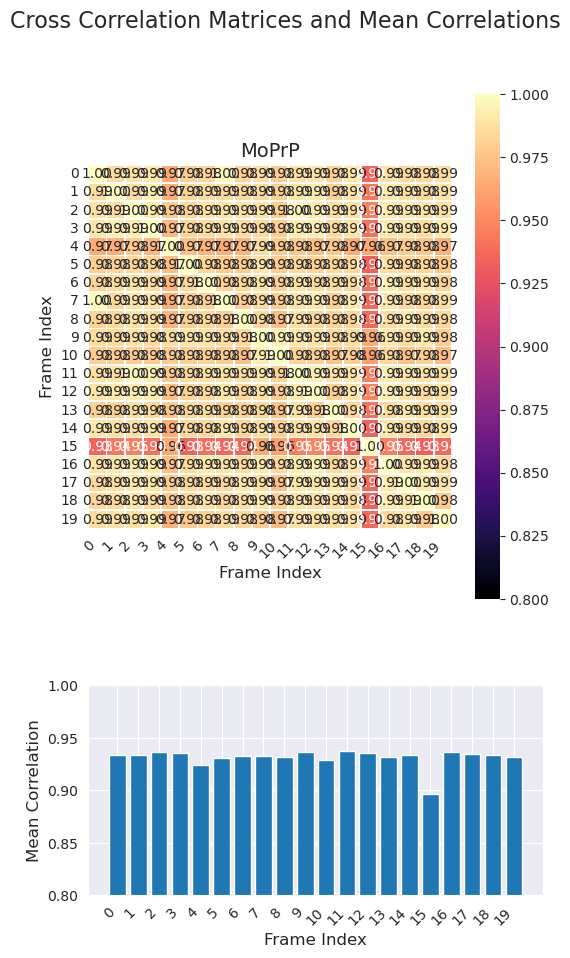

In [41]:


import seaborn as sns
import matplotlib.pyplot as plt

# Create a single figure with subplots for each protein
n_proteins = len(protein_names)
fig, axes = plt.subplots(2, n_proteins, figsize=(6 * n_proteins, 10), gridspec_kw={'height_ratios': [3, 1]})

for i, protein in enumerate(protein_names):
    cross_correlation_matrix = no_maskintra_residue_cross_correlation_df[no_maskintra_residue_cross_correlation_df["protein"] == protein]["intra_residue_cross_correlation"].values[0]
    row_sum = np.sum(cross_correlation_matrix, axis=1)
    mean_rows = [(row - 1) / len(row_sum) for row in row_sum]

    # Plot the heatmap on the corresponding subplot
    sns.heatmap(cross_correlation_matrix, cmap="magma", vmin=0.8, vmax=1, annot=True, fmt=".2f", square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[0])

    # Set the title and labels for each heatmap subplot
    axes[0].set_title(f"{protein}", fontsize=14)
    axes[0].set_xlabel("Frame Index", fontsize=12)
    axes[0].set_ylabel("Frame Index", fontsize=12)

    # Rotate the x-tick labels for better readability
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=10)
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=10)

    # Plot the mean row as a bar chart on the corresponding subplot
    axes[1].bar(range(len(mean_rows)), mean_rows)
    axes[1].set_xlabel("Frame Index", fontsize=12)
    axes[1].set_ylabel("Mean Correlation", fontsize=12)
    axes[1].set_ylim(0.8,1)

    axes[1].set_xticks(range(len(mean_rows)))
    axes[1].set_xticklabels(range(len(mean_rows)), rotation=45, ha='right', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout(pad=3.0)

# Add a main title for the entire figure
fig.suptitle("Cross Correlation Matrices and Mean Correlations", fontsize=16)

# Display the plot
plt.show()

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



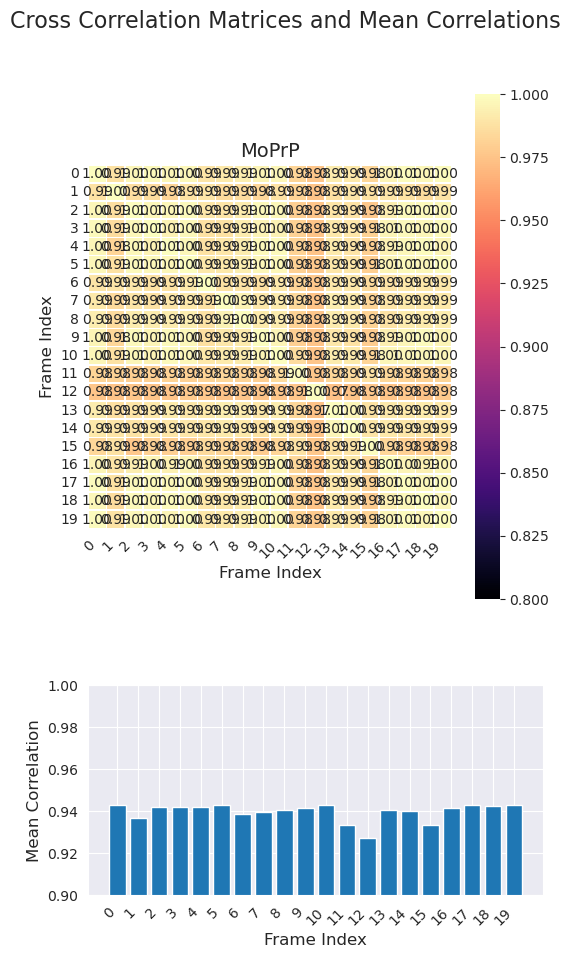

In [42]:

confmask_intra_residue_cross_correlation_df = pd.DataFrame()

for protein in protein_names:
    frame_indexes = conf_masks_frames[protein]
      # Specify the frame indexes for cross correlation calculation
    residues = res_data[protein]
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    intra_residue_cross_correlation = calc_intra_residue_cross_correlation(universe, frame_indexes, residues=residues)
    df_to_add = pd.DataFrame({"protein": protein, "intra_residue_cross_correlation": [intra_residue_cross_correlation]})
    confmask_intra_residue_cross_correlation_df = pd.concat([confmask_intra_residue_cross_correlation_df, df_to_add], axis=0)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a single figure with subplots for each protein
n_proteins = len(protein_names)
fig, axes = plt.subplots(2, n_proteins, figsize=(6 * n_proteins, 10), gridspec_kw={'height_ratios': [3, 1]})

for i, protein in enumerate(protein_names):
    cross_correlation_matrix = confmask_intra_residue_cross_correlation_df[confmask_intra_residue_cross_correlation_df["protein"] == protein]["intra_residue_cross_correlation"].values[0]
    row_sum = np.sum(cross_correlation_matrix, axis=1)
    mean_rows = [(row - 1) / len(row_sum) for row in row_sum]

    # Plot the heatmap on the corresponding subplot
    sns.heatmap(cross_correlation_matrix, cmap="magma", vmin=0.8, vmax=1, annot=True, fmt=".2f", square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[0])

    # Set the title and labels for each heatmap subplot
    axes[0].set_title(f"{protein}", fontsize=14)
    axes[0].set_xlabel("Frame Index", fontsize=12)
    axes[0].set_ylabel("Frame Index", fontsize=12)

    # Rotate the x-tick labels for better readability
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=10)
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=10)

    # Plot the mean row as a bar chart on the corresponding subplot
    axes[1].bar(range(len(mean_rows)), mean_rows)
    axes[1].set_xlabel("Frame Index", fontsize=12)
    axes[1].set_ylabel("Mean Correlation", fontsize=12)
    axes[1].set_ylim(0.9,1)

    axes[1].set_xticks(range(len(mean_rows)))
    axes[1].set_xticklabels(range(len(mean_rows)), rotation=45, ha='right', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout(pad=3.0)

# Add a main title for the entire figure
fig.suptitle("Cross Correlation Matrices and Mean Correlations", fontsize=16)

# Display the plot
plt.show()

In [43]:

con_cov_intra_residue_cross_correlation_df = pd.DataFrame()

for protein in protein_names:
    frame_indexes = con_cov_masks_frames[protein]
      # Specify the frame indexes for cross correlation calculation
    residues = res_data[protein]
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    intra_residue_cross_correlation = calc_intra_residue_cross_correlation(universe, frame_indexes, residues=residues)
    df_to_add = pd.DataFrame({"protein": protein, "intra_residue_cross_correlation": [intra_residue_cross_correlation]})
    con_cov_intra_residue_cross_correlation_df = pd.concat([con_cov_intra_residue_cross_correlation_df, df_to_add], axis=0)


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



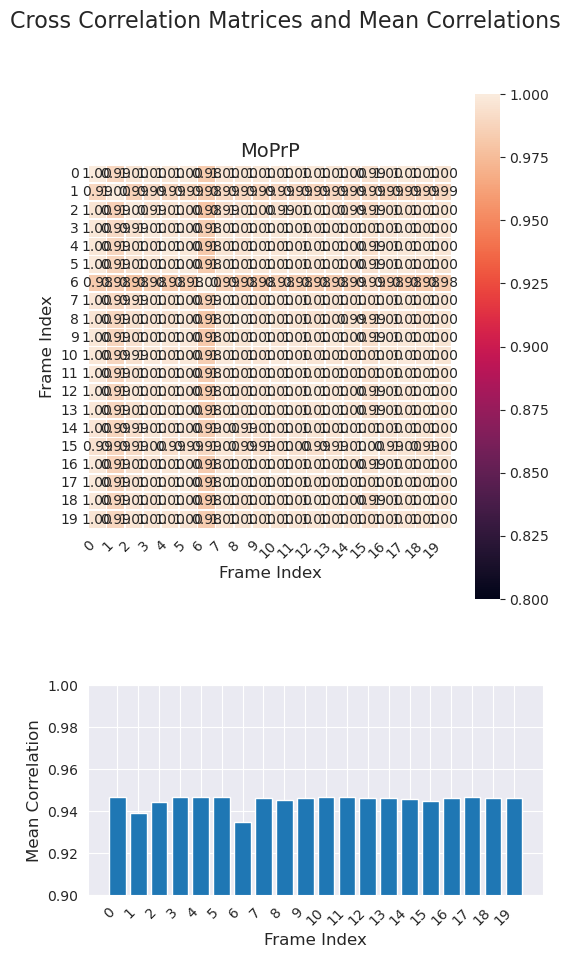

In [44]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a single figure with subplots for each protein
n_proteins = len(protein_names)
fig, axes = plt.subplots(2, n_proteins, figsize=(6 * n_proteins, 10), gridspec_kw={'height_ratios': [3, 1]})

for i, protein in enumerate(protein_names):
    cross_correlation_matrix = con_cov_intra_residue_cross_correlation_df[con_cov_intra_residue_cross_correlation_df["protein"] == protein]["intra_residue_cross_correlation"].values[0]
    row_sum = np.sum(cross_correlation_matrix, axis=1)
    mean_rows = [(row - 1) / len(row_sum) for row in row_sum]

    # create purple white green color map
    pwg_cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
    # Plot the heatmap on the corresponding subplot
    sns.heatmap(cross_correlation_matrix, cmap="rocket", vmin=0.8, vmax=1, annot=True, fmt=".2f", square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[0])

    # Set the title and labels for each heatmap subplot
    axes[0].set_title(f"{protein}", fontsize=14)
    axes[0].set_xlabel("Frame Index", fontsize=12)
    axes[0].set_ylabel("Frame Index", fontsize=12)

    # Rotate the x-tick labels for better readability
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=10)
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=10)

    # Plot the mean row as a bar chart on the corresponding subplot
    axes[1].bar(range(len(mean_rows)), mean_rows)
    axes[1].set_xlabel("Frame Index", fontsize=12)
    axes[1].set_ylabel("Mean Correlation", fontsize=12)
    axes[1].set_ylim(0.9,1)

    axes[1].set_xticks(range(len(mean_rows)))
    axes[1].set_xticklabels(range(len(mean_rows)), rotation=45, ha='right', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout(pad=3.0)

# Add a main title for the entire figure
fig.suptitle("Cross Correlation Matrices and Mean Correlations", fontsize=16)

# Display the plot
plt.show()

In [45]:

full_mask_intra_residue_cross_correlation_df = pd.DataFrame()

for protein in protein_names:
    frame_indexes = all_masks_frames[protein]
      # Specify the frame indexes for cross correlation calculation
    residues = res_data[protein]
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    intra_residue_cross_correlation = calc_intra_residue_cross_correlation(universe, frame_indexes, residues=residues)
    df_to_add = pd.DataFrame({"protein": protein, "intra_residue_cross_correlation": [intra_residue_cross_correlation]})
    full_mask_intra_residue_cross_correlation_df = pd.concat([full_mask_intra_residue_cross_correlation_df, df_to_add], axis=0)


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



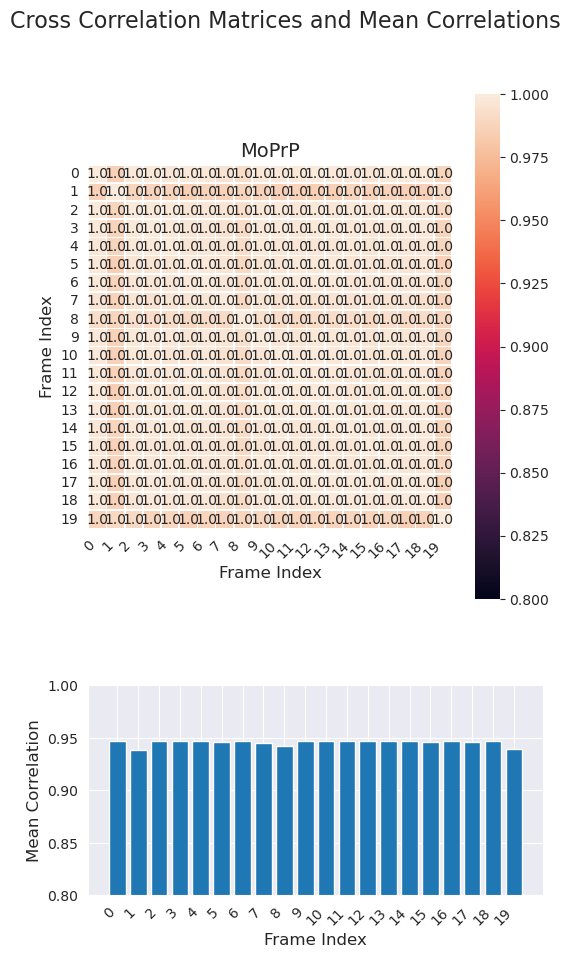

In [46]:

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a single figure with subplots for each protein
n_proteins = len(protein_names)
fig, axes = plt.subplots(2, n_proteins, figsize=(6 * n_proteins, 10), gridspec_kw={'height_ratios': [3, 1]})

for i, protein in enumerate(protein_names):
    cross_correlation_matrix = full_mask_intra_residue_cross_correlation_df[full_mask_intra_residue_cross_correlation_df["protein"] == protein]["intra_residue_cross_correlation"].values[0]
    row_sum = np.sum(cross_correlation_matrix, axis=1)
    mean_rows = [(row - 1) / len(row_sum) for row in row_sum]

    # create purple white green color map (-1, 0, 1)
    # pwg_cmap = sns.diverging_palette(275, 150, s=150, l=55, n=50, as_cmap=True)
    # Plot the heatmap on the corresponding subplot
    sns.heatmap(cross_correlation_matrix, cmap="rocket", vmin=0.8, vmax=1, annot=True, fmt=".1f", square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[0])

    # Set the title and labels for each heatmap subplot
    axes[0].set_title(f"{protein}", fontsize=14)
    axes[0].set_xlabel("Frame Index", fontsize=12)
    axes[0].set_ylabel("Frame Index", fontsize=12)

    # Rotate the x-tick labels for better readability
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=10)
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=10)

    # Plot the mean row as a bar chart on the corresponding subplot
    axes[1].bar(range(len(mean_rows)), mean_rows)
    axes[1].set_xlabel("Frame Index", fontsize=12)
    axes[1].set_ylabel("Mean Correlation", fontsize=12)
    axes[1].set_xticks(range(len(mean_rows)))
    axes[1].set_xticklabels(range(len(mean_rows)), rotation=45, ha='right', fontsize=10)
    axes[1].set_ylim(0.8,1)

# Adjust the spacing between subplots
plt.tight_layout(pad=3.0)

# Add a main title for the entire figure
fig.suptitle("Cross Correlation Matrices and Mean Correlations", fontsize=16)

# Display the plot
plt.show()

MoPrP
[ 1659 10808   640 11534 11072  3922 11906  2447  8802  1547  2326 11422
  3941  1448 11604 11771   471  3000  2117 11481]


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



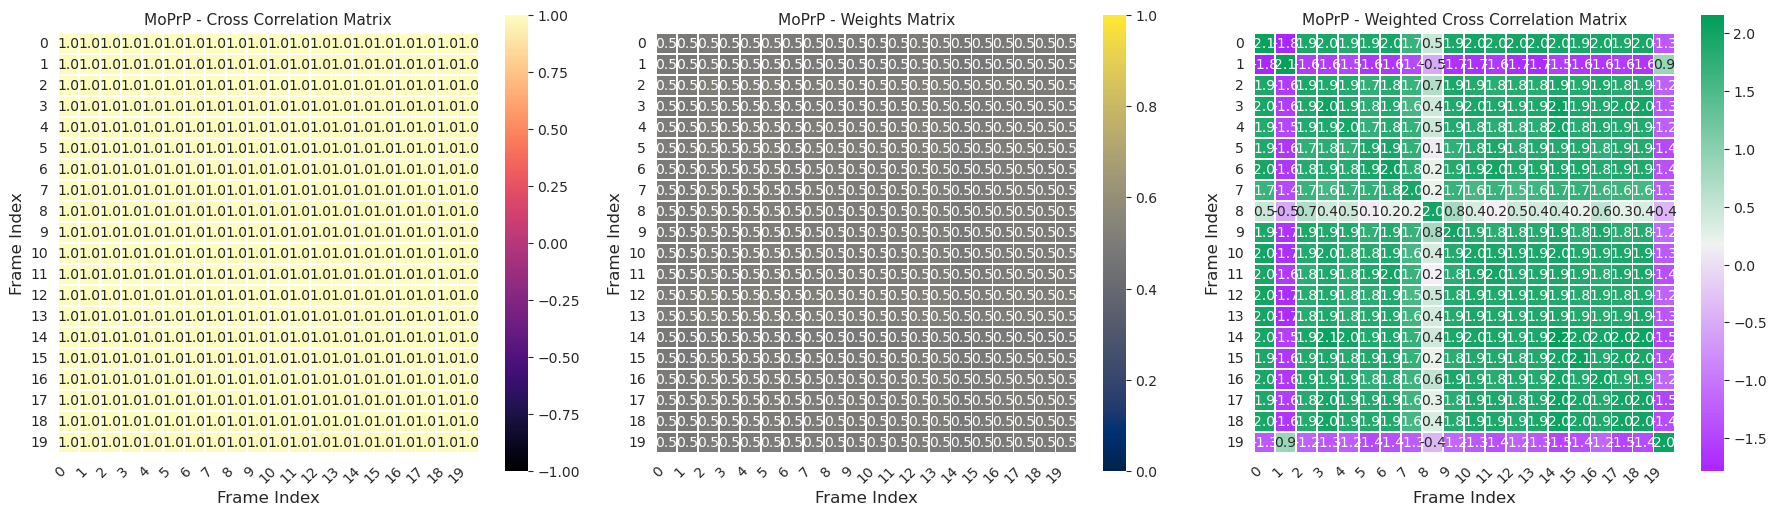

In [47]:

import datetime


# def calc_intra_residue_cross_correlation(universe, frame_indexes, residues):
#     sel = "protein and name CA"
#     if residues is not None:
#         resi_sel = " or ".join([f" resid {res}" for res in residues])
#         sel = sel + f" and ({resi_sel})"

#     if frame_indexes is None:
#         frame_indexes = list(range(len(universe.trajectory)))


#     ref = universe.select_atoms(sel)

#     alignment = AlignTraj(universe, ref, select=sel, in_memory=True).run()

#     n_frames = len(frame_indexes)
#     n_residues = len(ref.residues)

#     dist_matrices = []
#     for frame_index in frame_indexes:
#         universe.trajectory[frame_index]
#         coords = ref.positions
#         dist_matrix = squareform(pdist(coords))
#         dist_matrices.append(dist_matrix)

#     cross_correlation_matrix = np.zeros((n_frames, n_frames))
#     for i in range(n_frames):
#         for j in range(n_frames):
#             cross_correlation_matrix[i, j] = pearsonr(dist_matrices[i].flatten(), dist_matrices[j].flatten())[0]

#     return cross_correlation_matrix

def calc_weights_matrix(weights):

    n_frames = len(weights)

    weights_matrix = np.zeros((n_frames, n_frames))
    for i in range(n_frames):
        for j in range(n_frames):
            weights_ij = np.outer(weights[i], weights[j])[0][0]
            sum_weights = np.sum([weights[i], weights[j]])
            weights_matrix[i, j] = (float(weights_ij)/sum_weights) 

    return weights_matrix

def calc_weighted_intra_residue_cross_correlation(cross_correlation_matrix, weights):
    n_frames = len(weights)
    dist_matrices = []

    weighted_cross_correlation_matrix = np.zeros((n_frames, n_frames))
    for i in range(n_frames):
        for j in range(n_frames):
            weights_ij = np.outer(weights[i], weights[j])[0][0]
            sum_weights = np.sum([weights[i], weights[j]])
            weighted_cross_correlation_matrix[i, j] =  pearsonr(cross_correlation_matrix[i].flatten(), cross_correlation_matrix[j].flatten())[0]/(float(weights_ij)/sum_weights) 

    return weighted_cross_correlation_matrix





def plot_cross_correlation_matrices(universe, weights, residues, title_str, frame_indexes=None, save_dir=None):
    
    if frame_indexes is not None:
        assert len(weights) == len(frame_indexes), f"Number of weights {len(weights)} must match number of frame indexes {len(frame_indexes)}"

    # normalise weights to sum to the number of frames
    weights =  (weights/np.sum(weights))*len(weights)

    cross_correlation_matrix = calc_intra_residue_cross_correlation(universe, frame_indexes, residues)
    weights_matrix = calc_weights_matrix(weights)
    weighted_cross_correlation_matrix = calc_weighted_intra_residue_cross_correlation(cross_correlation_matrix, weights)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    sns.heatmap(cross_correlation_matrix, cmap="magma", vmin=-1, vmax=1, annot=True, fmt=".1f", square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax1)
    ax1.set_title(f"{title_str} - Cross Correlation Matrix", fontsize=11)
    ax1.set_xlabel("Frame Index", fontsize=12)
    ax1.set_ylabel("Frame Index", fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=10)

    pwg_cmap = sns.diverging_palette(275, 150, s=150, l=55, n=50, as_cmap=True)

    sns.heatmap(weights_matrix, cmap="cividis", vmin=0, vmax=1, annot=True, fmt=".1f", square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax2)
    ax2.set_title(f"{title_str} - Weights Matrix", fontsize=11)
    ax2.set_xlabel("Frame Index", fontsize=12)
    ax2.set_ylabel("Frame Index", fontsize=12)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize=10)


    sns.heatmap(weighted_cross_correlation_matrix, cmap=pwg_cmap, annot=True, fmt=".1f", square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax3)
    ax3.set_title(f"{title_str} - Weighted Cross Correlation Matrix", fontsize=11)
    ax3.set_xlabel("Frame Index", fontsize=12)
    ax3.set_ylabel("Frame Index", fontsize=12)
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, fontsize=10)

    plt.tight_layout()

    if save_dir is not None:
        time= datetime.datetime.now().strftime("%Y%m%d-%H%M%S.%f")[:-3]
        save_name = f"{title_str}_cross_correlation_matrices{time}.png"
        save_path = os.path.join(save_dir, save_name)        
        plt.savefig(save_path, format='png', dpi=300)
    else:
        plt.show()
        plt.close()


for i, protein in enumerate(protein_names):
    print(protein)
    frame_mask = all_masks_frames[protein]
    print(frame_mask)
    weights = plddt_data[protein]
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    residues = res_data[protein]
    weights = weights[frame_mask]
    plot_cross_correlation_matrices(universe, weights, residues, protein, frame_indexes=frame_mask, save_dir=None)




In [48]:
import MDAnalysis as mda
import json
import os

def filter_trajectories_and_save_plddt(protein_names, proteins, all_masks_indexes, plddt_data):
    """
    Filter trajectory frames based on masks and save to new files.
    Also save a JSON file with frame:plddt mapping for filtered frames.
    
    Args:
    - protein_names: List of protein names
    - proteins: Dictionary containing trajectory and topology information for each protein
    - all_masks_indexes: Dictionary containing frame masks for each protein
    - plddt_data: Dictionary containing pLDDT data for each protein
    """
    for protein in protein_names:
        frame_mask = all_masks_indexes[protein]
        traj = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
        print(f"Processing {protein}, number of frames: {len(frame_mask)}")
        
        # Create new trajectory file path
        new_traj_path = proteins[protein]["traj"].replace(".xtc", "_all_filtered.xtc")
        
        # Create frame:plddt mapping
        frame_plddt_map = {}
        
        with mda.Writer(new_traj_path, traj.atoms.n_atoms) as W:
            for i, frame in enumerate(frame_mask):
                traj.trajectory[frame]
                W.write(traj.atoms)
                frame_plddt_map[int(frame)] = float(plddt_data[protein][frame])
        
        # Save frame:plddt mapping to JSON
        json_path = os.path.splitext(new_traj_path)[0] + "_frame_plddt.json"
        with open(json_path, 'w') as json_file:
            json.dump(frame_plddt_map, json_file, indent=2)
        
        print(f"Saved filtered trajectory to: {new_traj_path}")
        print(f"Saved frame:plddt mapping to: {json_path}")

# Assuming you have the following data structures defined:
# protein_names, proteins, all_masks_indexes, plddt_data

# Run the function
filter_trajectories_and_save_plddt(protein_names, proteins, all_masks_indexes, plddt_data)

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



Processing MoPrP, number of frames: 11938
Saved filtered trajectory to: /home/alexi/Documents/xFold_Sampling/af_sample/MoPrP_plddt_ordered_all_filtered.xtc
Saved frame:plddt mapping to: /home/alexi/Documents/xFold_Sampling/af_sample/MoPrP_plddt_ordered_all_filtered_frame_plddt.json


In [49]:
# save trajectory frames to a new trajectory file - replace ".xtc" with "_all_filtered.xtc"
masked_phate_df = pd.DataFrame()
for protein in protein_names:
    # break÷
    frame_mask = all_masks_indexes[protein]
    traj = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    print(protein, len(frame_mask))
    # pass
    new_traj_path = proteins[protein]["traj"].replace(".xtc", "_all_filtered.xtc")
    
    with mda.Writer(new_traj_path, traj.atoms.n_atoms) as W:
        for frame in frame_mask:
            traj.trajectory[frame]
            W.write(traj.atoms)

    new_traj = mda.Universe(proteins[protein]["top"], new_traj_path)
    print(len(new_traj.trajectory))
    phate_embedding = calculate_phate(new_traj, num_components=2, residues=residues, ref_frame_index=ref_index)
    df_to_add = pd.DataFrame({"protein": protein, "phate": [phate_embedding], "n_dims": n_dims})
    masked_phate_df = pd.concat([masked_phate_df, df_to_add], axis=0)


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



MoPrP 11938
11938
Calculating PHATE...
  Running PHATE on 11938 observations and 3081 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 16.71 seconds.
    Calculating KNN search...
    Calculated KNN search in 36.83 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 53.64 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 16.58 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.24 seconds.
  Calculated landmark operator in 20.32 seconds.
  Calculating optimal t...
    Automatically selected t = 40
  Calculated optimal t in 3.47 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.72 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 9.41 seconds.
Calculated PHATE in 87.58 seconds.


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



ValueError: 'c' argument has 12700 elements, which is inconsistent with 'x' and 'y' with size 11901.

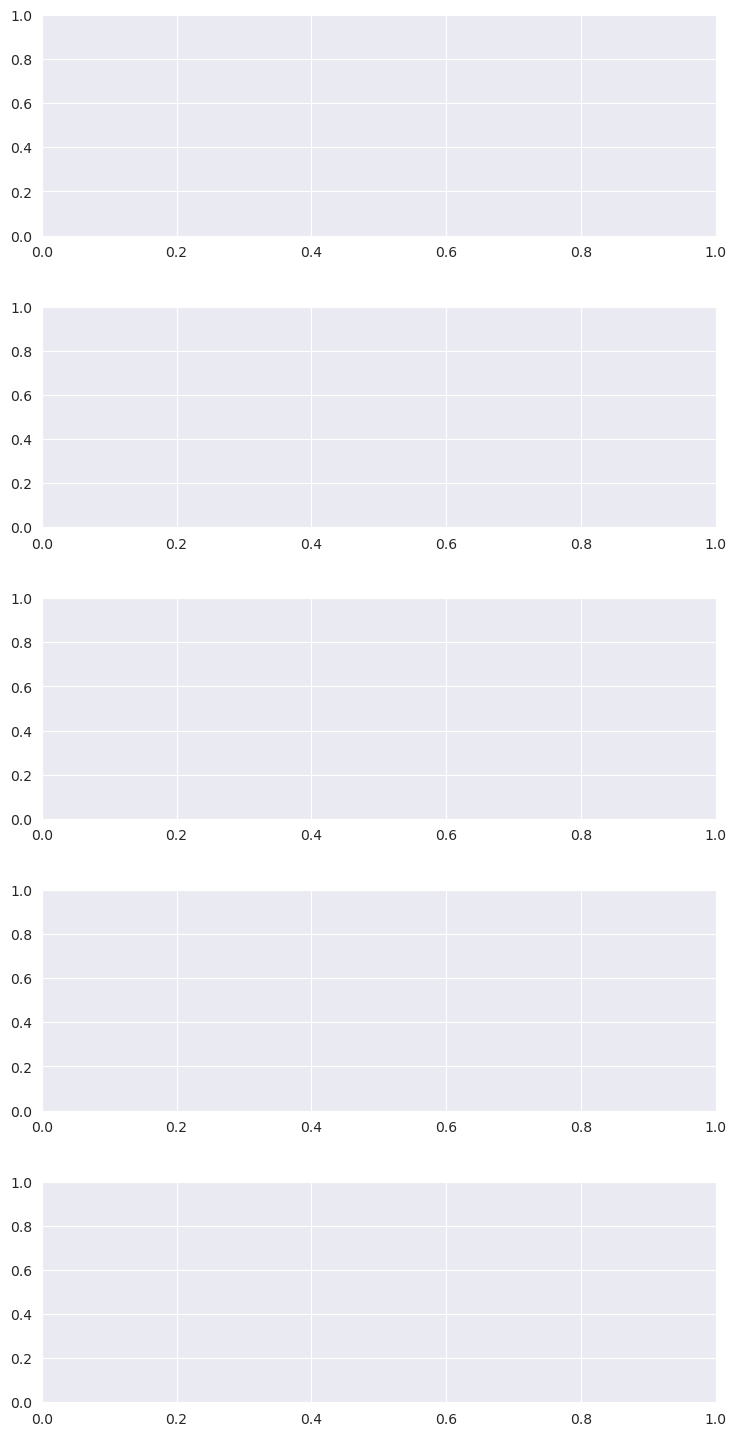

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D plot for each protein
fig, axes = plt.subplots(len(protein_names), 1, figsize=(8, 3*len(protein_names)), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)


phate_frames = {}

for i, protein in enumerate(protein_names):
    intra_residue_dists = intra_residue_dist_df[intra_residue_dist_df["protein"]==protein]["intra_residue_dist"].values[0]
    rmsd = RMSD_df[RMSD_df["protein"] == protein]["RMSD"].values[0]
    plddt = plddt_data[protein]
    phate_data = masked_phate_df[masked_phate_df["protein"]==protein]["phate"].values[0]
    max_pae = max_pae_data[protein]
    ptm = ptm_data[protein]


    clashes = clashes_df[clashes_df["protein"] == protein]["clashes"].values[0]
    
    c = contact_order_df[contact_order_df["protein"] == protein]["contact_order"].values[0]
    covariance = intra_residue_covariance_df[intra_residue_covariance_df["protein"] == protein]["intra_residue_covariance"].values[0]
    pca = pca_df[pca_df["protein"]==protein]["pca"].values[0]
    frame_mask = all_masks_indexes[protein]
    pca_labels = all_masks_labels[protein]
    pca = phate_data
    _pca = pca
    pca1 = _pca[:,0]
    pca2 = _pca[:,1]
    closest_frames = all_masks_frames[protein]

    kmeans = KMeans(n_clusters=k_clusters, random_state=42)

    kmeans.fit(pca)

    # Get the cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Find the closest frames to each cluster center
    closest_frames = kmeans.transform(phate_data).argmin(axis=0)


    # get cluster labels
    labels = kmeans.labels_

    phate_frames[protein] = closest_frames

    clashes = clashes[frame_mask]

    scatter = axes[i].scatter(pca1, pca2, c=plddt, cmap='viridis', alpha=0.5, s=5)




    if len(closest_frames) <= 25:
        # annotate each cluster_center with its cluster number
        for j, txt in enumerate(closest_frames):


            axes[i].annotate(j, (_pca[txt, 0], _pca[txt, 1]), fontsize=8, color='red')


            # axes[i].annotate(i, (new_cluster_centers[i, 0], new_cluster_centers[i, 1]), fontsize=8, color='red')
        

    max_plddt_index = np.where(plddt == np.max(plddt[frame_mask]))[0][0]
    print("Max plddt index", max_plddt_index)

# 

    max_pae_index = np.where(max_pae == np.max(max_pae[frame_mask]))[0][0]
    print("Max pae index", max_pae_index)   





    axes[i].set_title(protein)
    axes[i].set_xlabel('PHATE1')
    axes[i].set_ylabel('PHATE2')

    # Add colorbar
    
    cbar = fig.colorbar(scatter, ax=axes[i], shrink=0.8)
    cbar.set_label('Label')

fig.suptitle('2D Scatter Plot of PHATE1 and PHATE2')
plt.tight_layout()
plt.show()

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



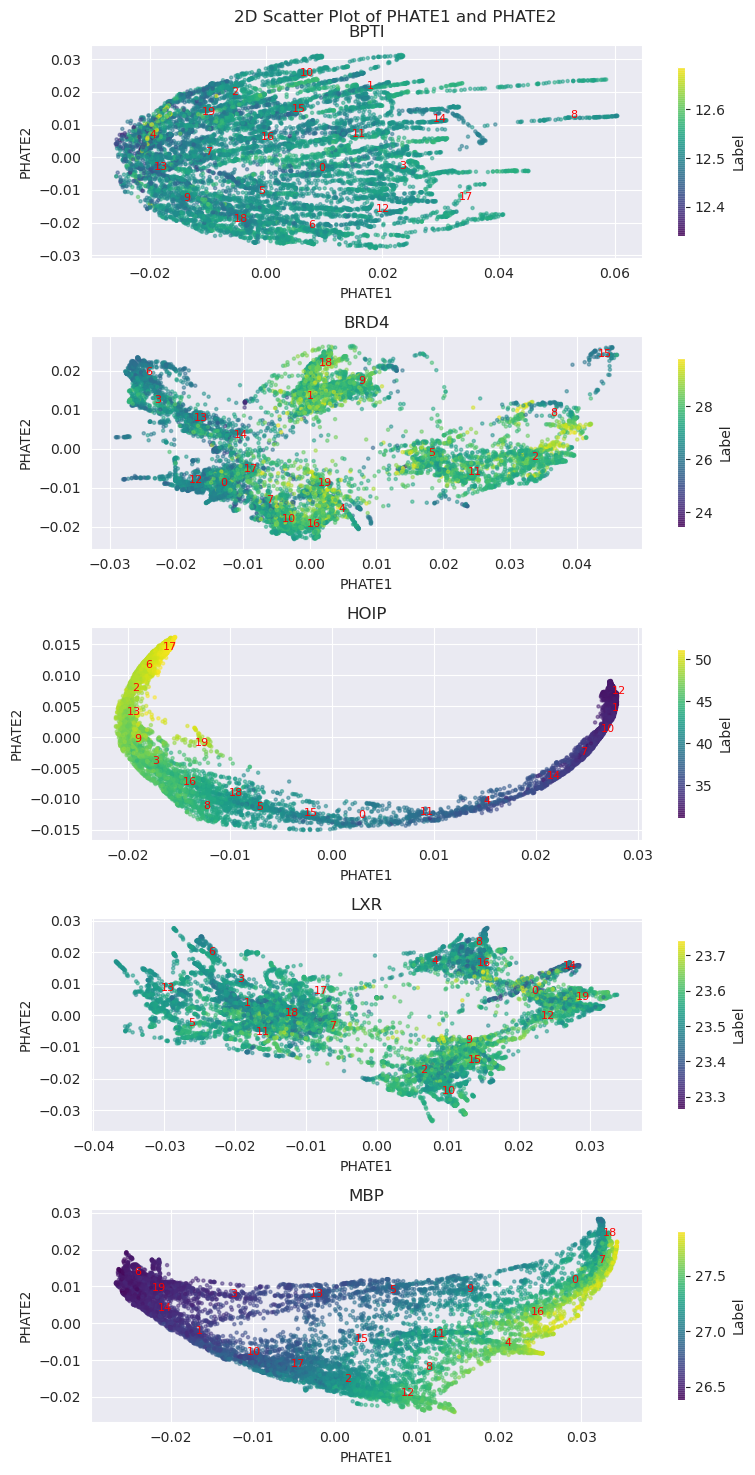

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D plot for each protein
fig, axes = plt.subplots(len(protein_names), 1, figsize=(8, 3*len(protein_names)), sharex=False, sharey=False)
fig.tight_layout(pad=3.0)


phate_frames = {}

for i, protein in enumerate(protein_names):
    intra_residue_dists = intra_residue_dist_df[intra_residue_dist_df["protein"]==protein]["intra_residue_dist"].values[0]
    rmsd = RMSD_df[RMSD_df["protein"] == protein]["RMSD"].values[0]
    plddt = plddt_data[protein]
    phate_data = masked_phate_df[masked_phate_df["protein"]==protein]["phate"].values[0]
    max_pae = max_pae_data[protein]
    ptm = ptm_data[protein]



    
    c = contact_order_df[contact_order_df["protein"] == protein]["contact_order"].values[0]
    covariance = intra_residue_covariance_df[intra_residue_covariance_df["protein"] == protein]["intra_residue_covariance"].values[0]
    pca = pca_df[pca_df["protein"]==protein]["pca"].values[0]
    frame_mask = all_masks_indexes[protein]
    pca_labels = all_masks_labels[protein]
    pca = phate_data
    _pca = pca
    pca1 = _pca[:,0]
    pca2 = _pca[:,1]
    closest_frames = all_masks_frames[protein]

    kmeans = KMeans(n_clusters=k_clusters, random_state=42)

    kmeans.fit(pca)

    # Get the cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Find the closest frames to each cluster center
    closest_frames = kmeans.transform(phate_data).argmin(axis=0)


    # get cluster labels
    labels = kmeans.labels_

    phate_frames[protein] = closest_frames


    scatter = axes[i].scatter(pca1, pca2, c=intra_residue_dists[frame_mask], cmap='viridis', alpha=0.5, s=5)

    if len(closest_frames) <= 25:
        # annotate each cluster_center with its cluster number
        for j, txt in enumerate(closest_frames):


            axes[i].annotate(j, (_pca[txt, 0], _pca[txt, 1]), fontsize=8, color='red')


            # axes[i].annotate(i, (new_cluster_centers[i, 0], new_cluster_centers[i, 1]), fontsize=8, color='red')
        



    axes[i].set_title(protein)
    axes[i].set_xlabel('PHATE1')
    axes[i].set_ylabel('PHATE2')

    # Add colorbar
    
    cbar = fig.colorbar(scatter, ax=axes[i], shrink=0.8)
    cbar.set_label('Label')

fig.suptitle('2D Scatter Plot of PHATE1 and PHATE2')
plt.tight_layout()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Create a 2D plot for each protein
# fig, axes = plt.subplots(len(protein_names), 1, figsize=(8, 3*len(protein_names)), sharex=False, sharey=False)
# fig.tight_layout(pad=3.0)


# phate_frames = {}

# for i, protein in enumerate(protein_names):
#     intra_residue_dists = intra_residue_dist_df[intra_residue_dist_df["protein"]==protein]["intra_residue_dist"].values[0]
#     rmsd = RMSD_df[RMSD_df["protein"] == protein]["RMSD"].values[0]
#     plddt = plddt_data[protein]
#     phate_data = masked_phate_df[masked_phate_df["protein"]==protein]["phate"].values[0]
#     max_pae = max_pae_data[protein]
#     ptm = ptm_data[protein]



    
#     c = contact_order_df[contact_order_df["protein"] == protein]["contact_order"].values[0]
#     covariance = intra_residue_covariance_df[intra_residue_covariance_df["protein"] == protein]["intra_residue_covariance"].values[0]
#     pca = pca_df[pca_df["protein"]==protein]["pca"].values[0]
#     frame_mask = all_masks_indexes[protein]
#     pca_labels = all_masks_labels[protein]
#     pca = phate_data
#     _pca = pca
#     pca1 = _pca[:,0]
#     pca2 = _pca[:,1]
#     closest_frames = all_masks_frames[protein]

#     kmeans = KMeans(n_clusters=k_clusters, random_state=42)

#     kmeans.fit(pca)

#     # Get the cluster centers
#     cluster_centers = kmeans.cluster_centers_

#     # Find the closest frames to each cluster center
#     closest_frames = kmeans.transform(phate_data).argmin(axis=0)


#     # get cluster labels
#     labels = kmeans.labels_

#     phate_frames[protein] = closest_frames

#     pca = pca_df[pca_df["protein"]==protein]["pca"].values[0]

#     _pca = pca[frame_mask]
#     pca1 = _pca[:,0]
#     pca2 = _pca[:,1]

#     scatter = axes[i].scatter(pca1, pca2, c=labels, cmap='viridis', alpha=0.5, s=5)

#     if len(closest_frames) <= 25:
#         # annotate each cluster_center with its cluster number
#         for j, txt in enumerate(closest_frames):


#             axes[i].annotate(j, (_pca[txt, 0], _pca[txt, 1]), fontsize=8, color='red')


#             # axes[i].annotate(i, (new_cluster_centers[i, 0], new_cluster_centers[i, 1]), fontsize=8, color='red')
        



#     axes[i].set_title(protein)
#     axes[i].set_xlabel('PHATE1')
#     axes[i].set_ylabel('PHATE2')

#     # Add colorbar
    
#     cbar = fig.colorbar(scatter, ax=axes[i], shrink=0.8)
#     cbar.set_label('Label')

# fig.suptitle('2D Scatter Plot of PHATE1 and PHATE2')
# plt.tight_layout()
# plt.show()

BPTI
[ 4455  3340  1978  6205 11612   841  9525   298  4219  1383  9199  5135
  1544  2679  1211  1166  9342  6232  8931  9865]


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



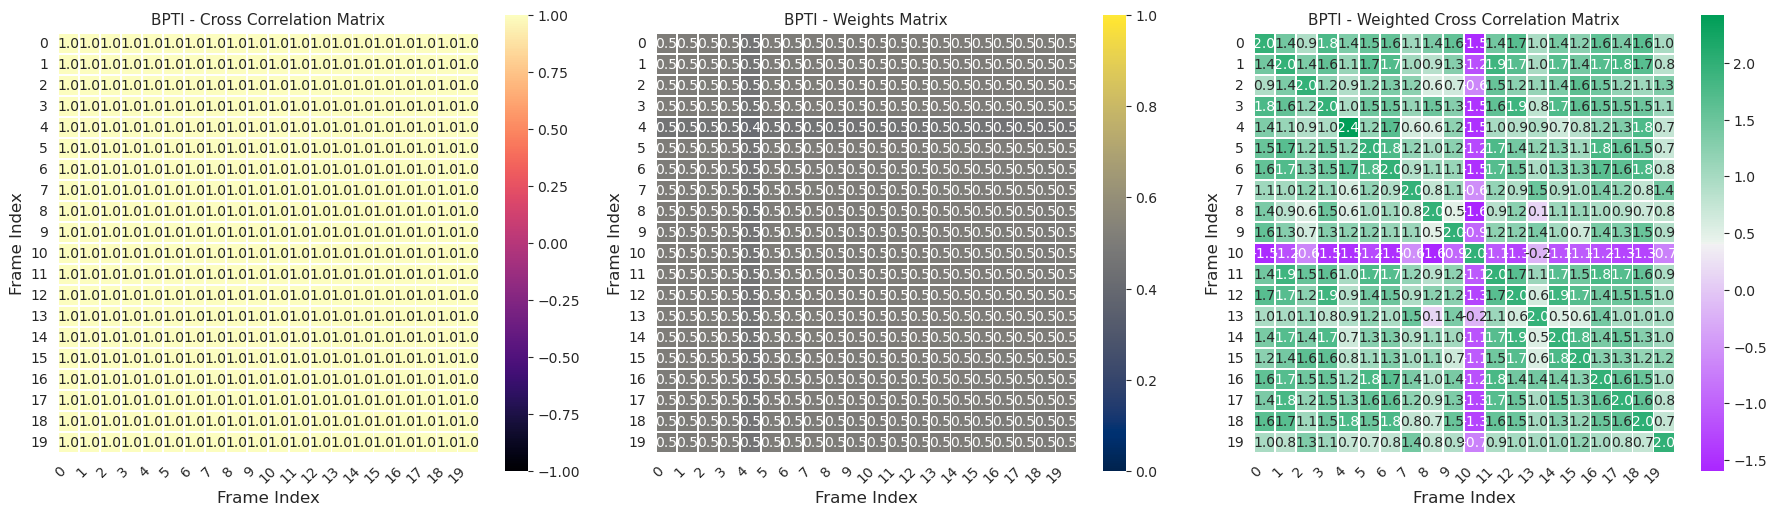

BRD4
[ 7674  2535  2748  6982  7984  9592  7638   386  8974  4191   468 10235
  1513  8478 10112  1700  1066  8257   599  8654]


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



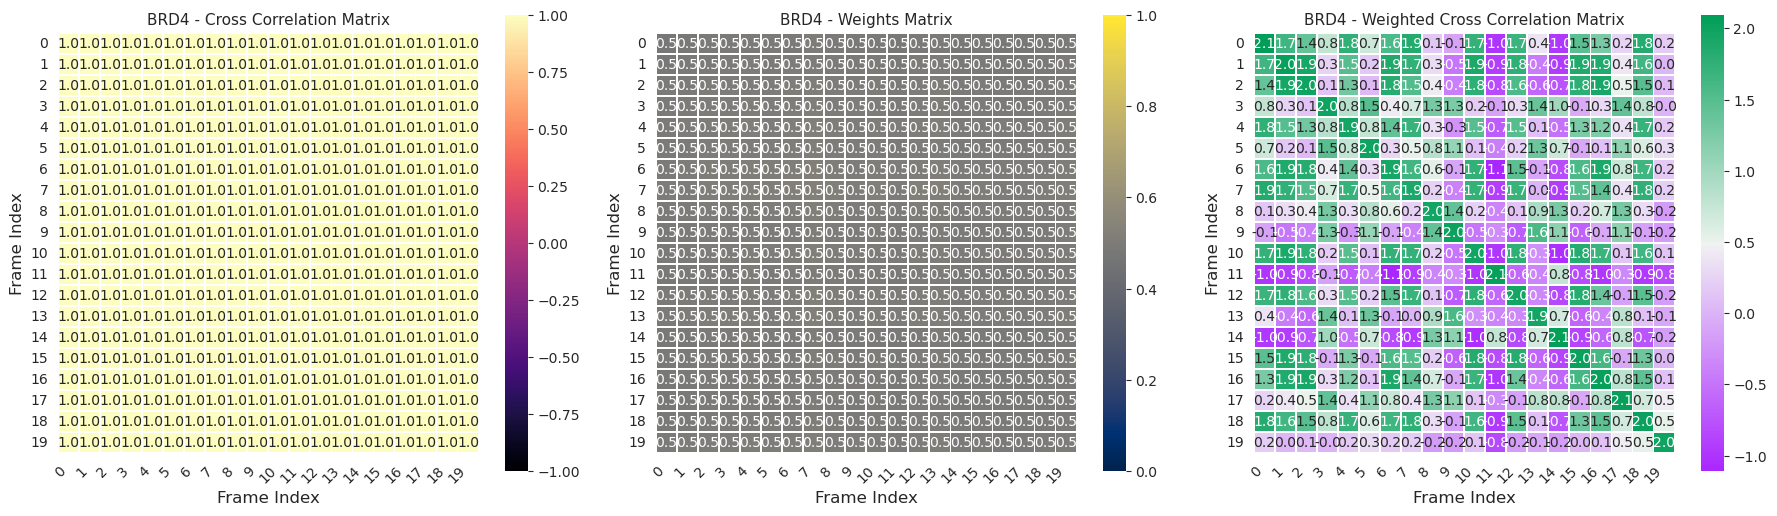

HOIP
[3927  262 7478 2896 5167  253 3204  537 8473 6048 1538 8683 5791 2836
 9495 9120 7785 4904 7964 9084]


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



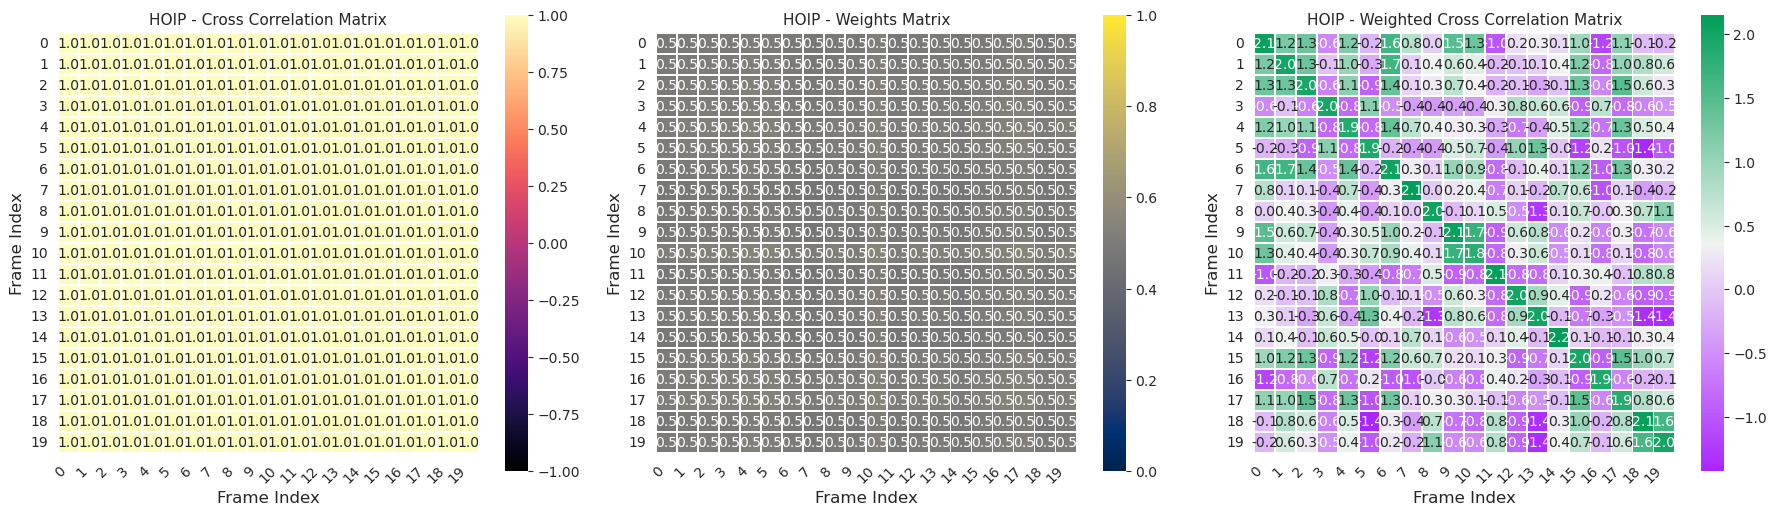

LXR
[10466  2069  5436  4982  3178  4564  7008  6899  1192  6806   520  5644
  8186   794 11447  3472 10324  4509  8861  9473]


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



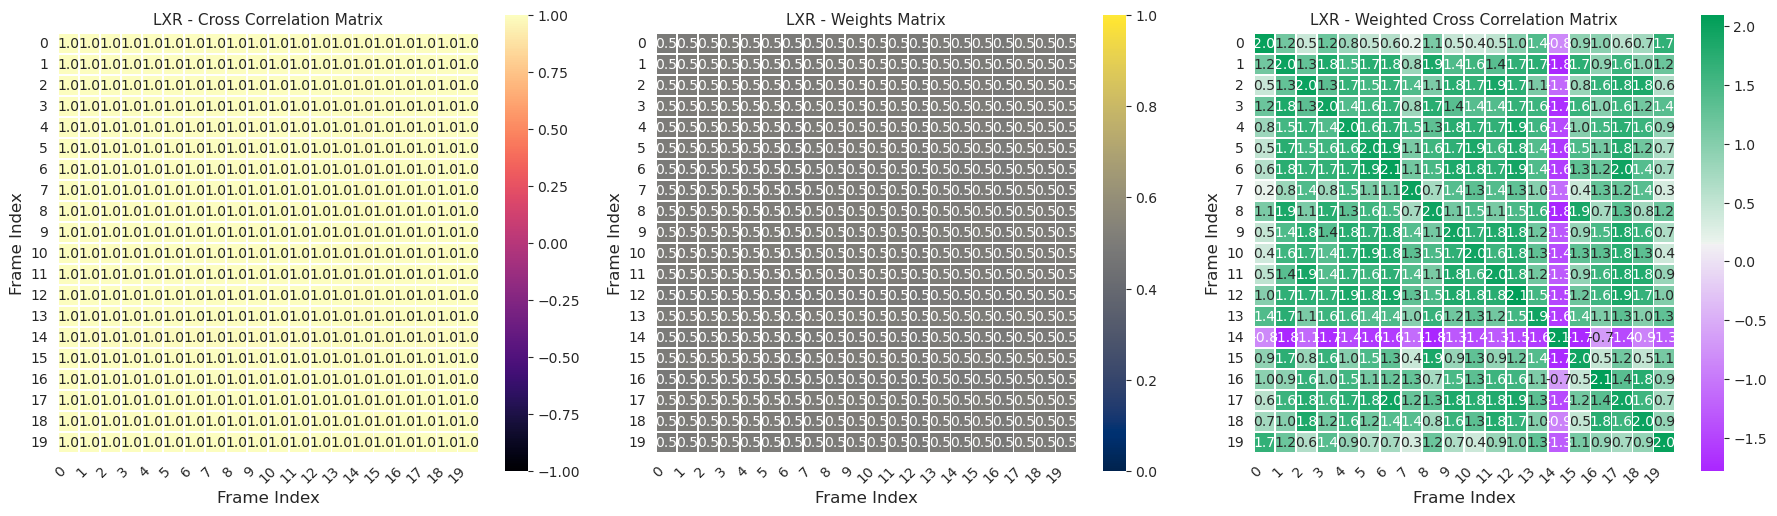

MBP
[10004  4537  4022  7111   739  8177  1189 10090   980  1959  4421 10141
  4308  3199  2120 10873 10690 10261 10053  6220]


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning:

invalid value encountered in scalar divide

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning:

invalid value encountered in scalar divide



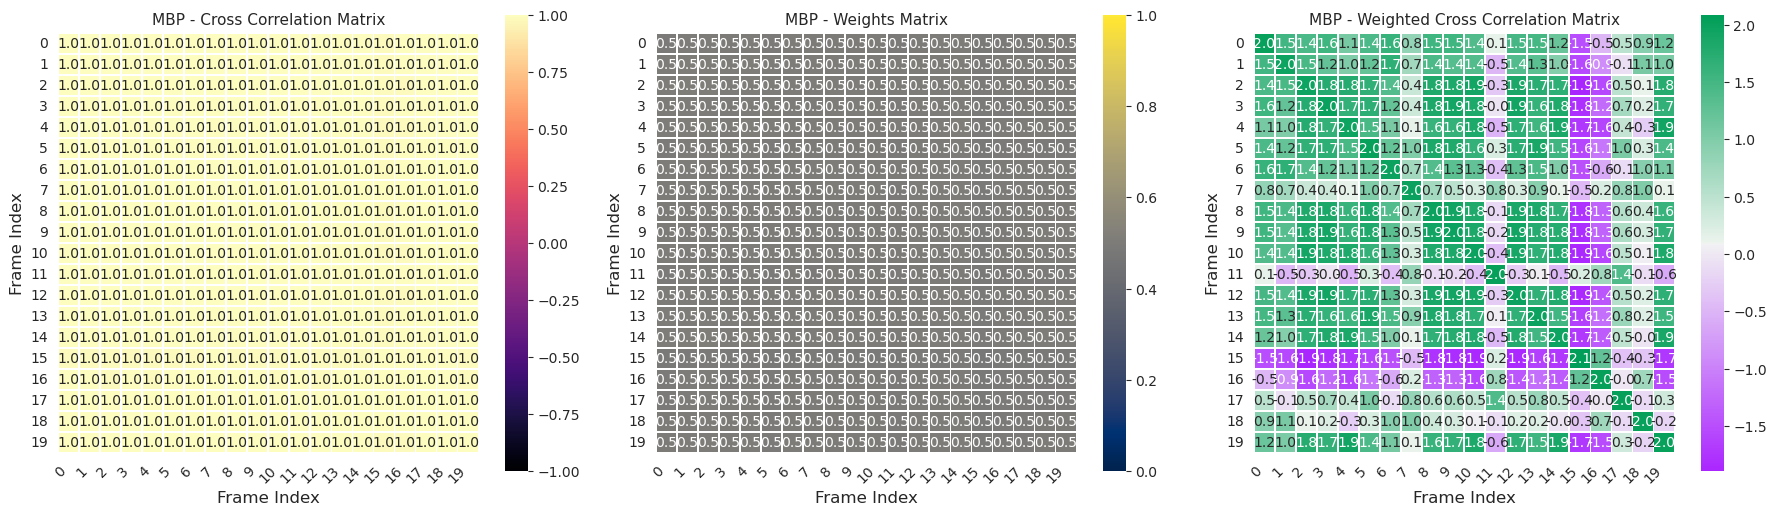

In [ ]:


for i, protein in enumerate(protein_names):
    print(protein)
    frame_mask = phate_frames[protein]
    print(frame_mask)
    weights = plddt_data[protein]
    universe = mda.Universe(proteins[protein]["top"], proteins[protein]["traj"])
    residues = res_data[protein]
    weights = weights[frame_mask]
    plot_cross_correlation_matrices(universe, weights, residues, protein, frame_indexes=frame_mask, save_dir=None)

